<a href="https://colab.research.google.com/github/rheapatel26/HousePrice_Prediction/blob/main/house_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/house prediction/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/house prediction/test.csv')

Mounted at /content/drive


In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
if 'Id' in df.columns and 'MiscVal' in df.columns:
    df = df.drop(columns=['Id', 'MiscVal'])
elif 'Id' in df.columns:
    df = df.drop(columns=['Id'])
elif 'MiscVal' in df.columns:
    df = df.drop(columns=['MiscVal'])
else:
    print("Neither 'Id' nor 'MiscVal' found in the DataFrame.")

In [6]:
feautres_na = [features for features in df.columns if df[features].isnull().sum()>1]
feautres_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
for features in feautres_na:
    print(features,np.round(df[features].isnull().mean(),4),'%')

LotFrontage 0.1774 %
Alley 0.9377 %
MasVnrType 0.5973 %
MasVnrArea 0.0055 %
BsmtQual 0.0253 %
BsmtCond 0.0253 %
BsmtExposure 0.026 %
BsmtFinType1 0.0253 %
BsmtFinType2 0.026 %
FireplaceQu 0.4726 %
GarageType 0.0555 %
GarageYrBlt 0.0555 %
GarageFinish 0.0555 %
GarageQual 0.0555 %
GarageCond 0.0555 %
PoolQC 0.9952 %
Fence 0.8075 %
MiscFeature 0.963 %


In [8]:
mv_features = [features for features in feautres_na if (np.round(df[features].isnull().mean(),4)) > 0.5]
mv_features

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

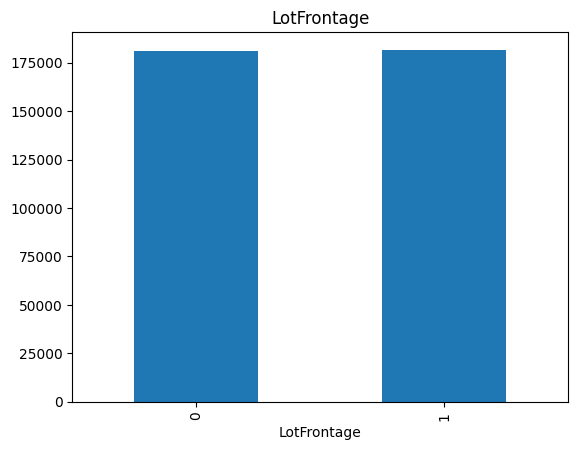

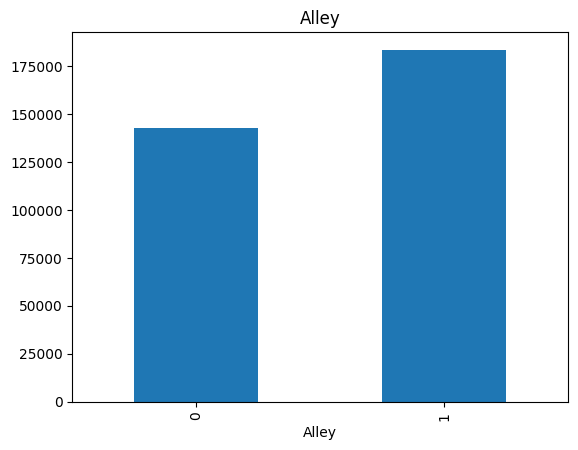

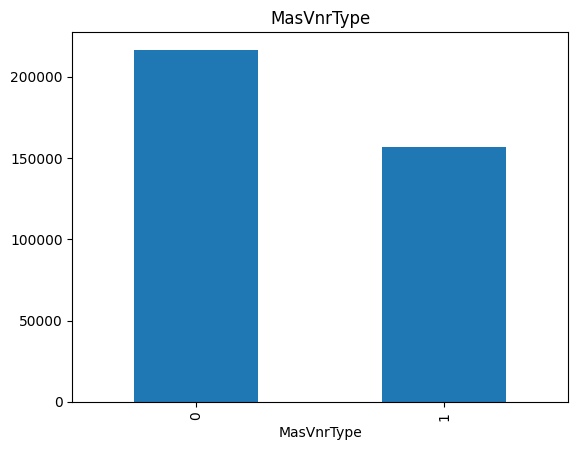

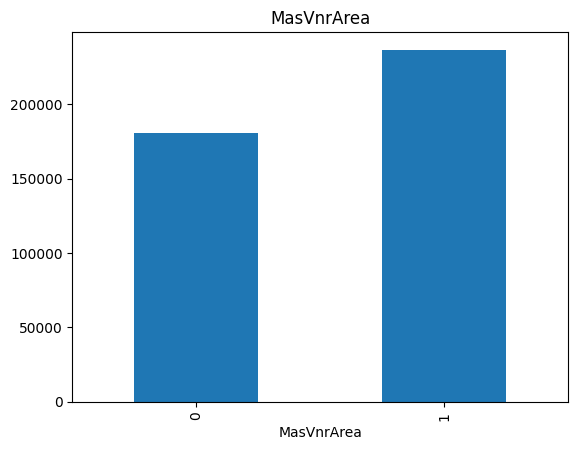

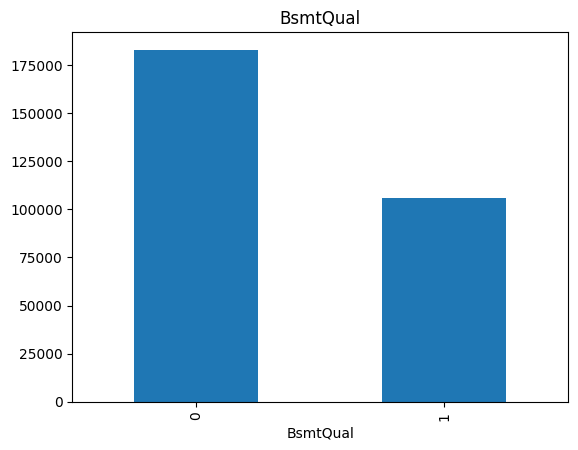

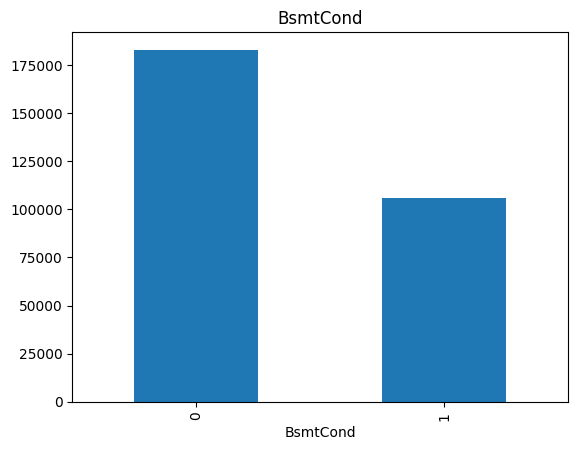

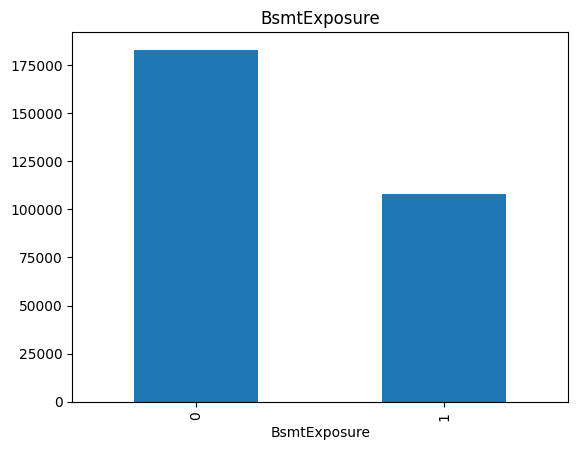

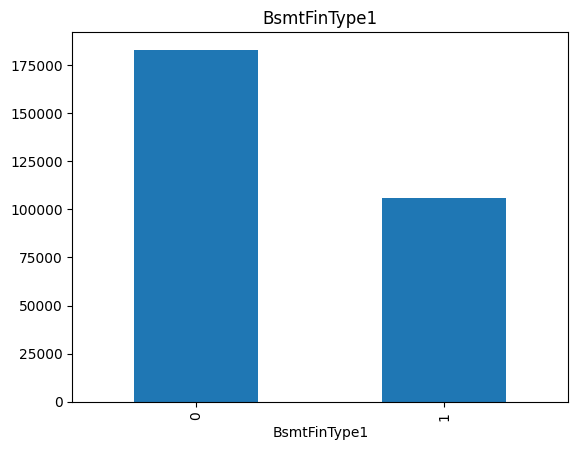

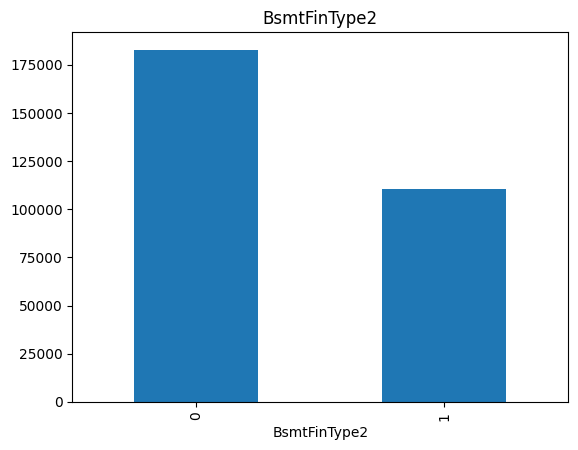

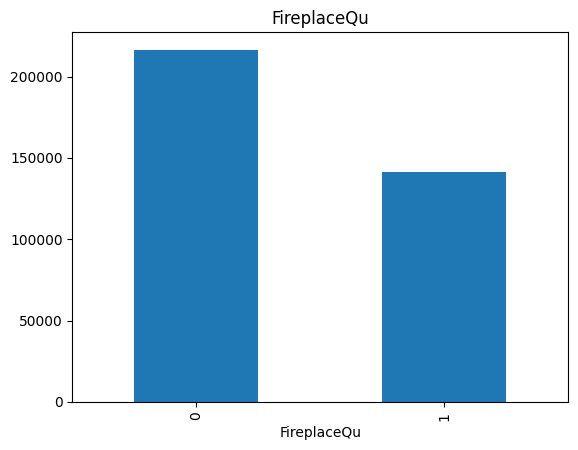

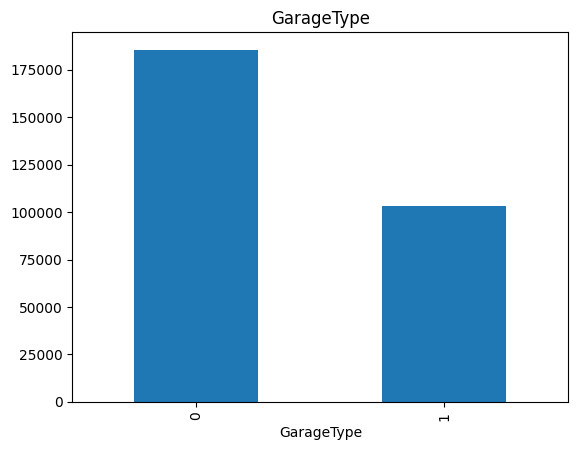

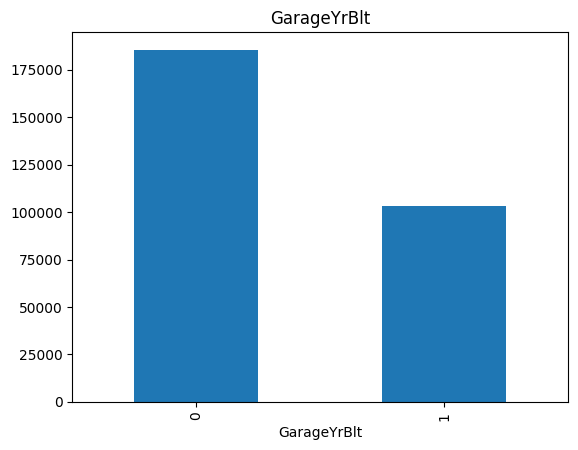

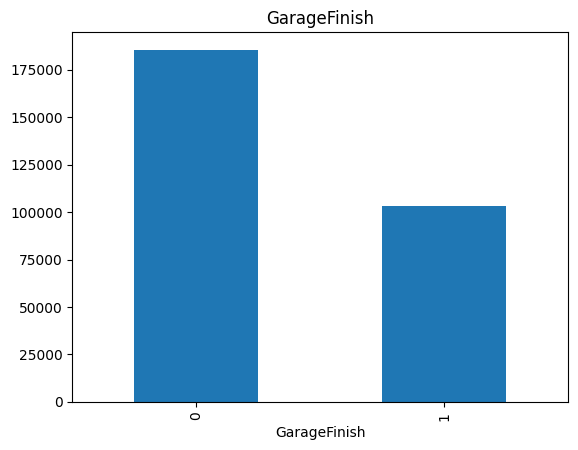

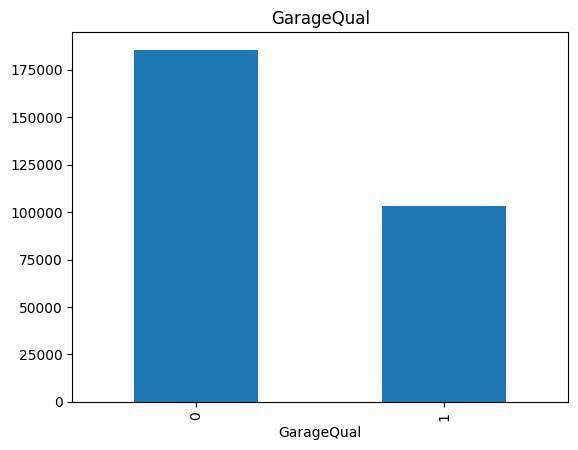

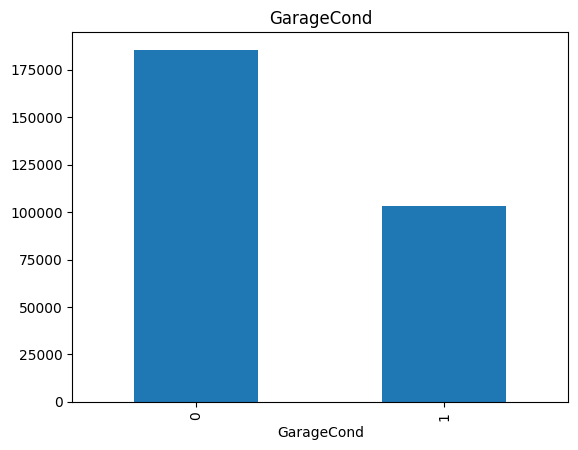

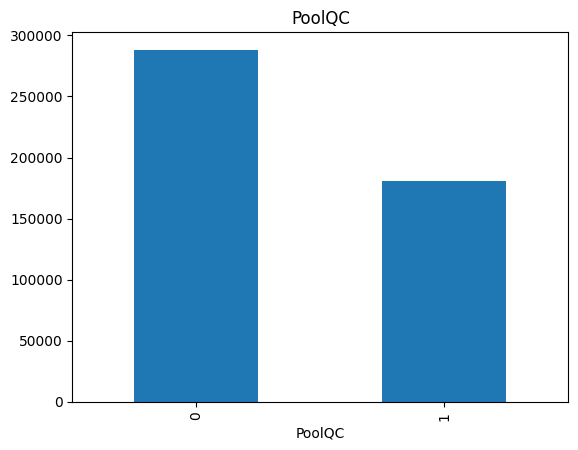

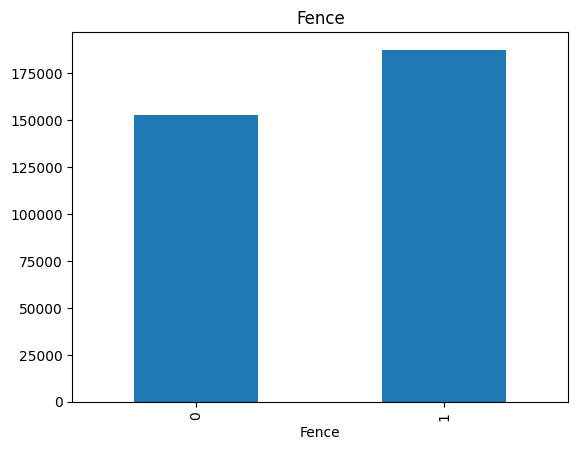

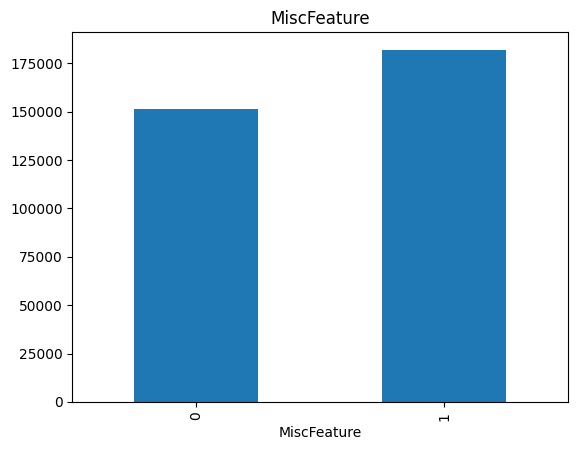

In [9]:
for feature in feautres_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [10]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'YrSold',
 'SalePrice']

In [11]:
df[numerical_features].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0         706           0  ...         548   
1          1976         0.0         978           0  ...         460   
2          2002       162.0         486           0  ...         608   
3          1970         0.0         216           0  ...         642   
4          2000       350.0         655           0  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 36 columns]

In [12]:
year_features = [features for features in numerical_features if "Yr" in features or "Year" in features]
year_features #for house age calculation

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<Axes: xlabel='YrSold'>

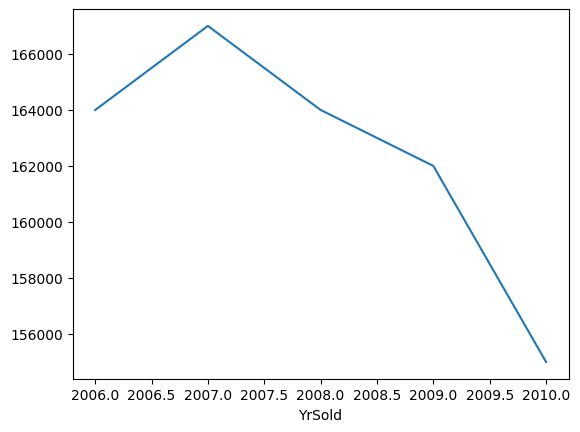

In [13]:
df.groupby('YrSold')['SalePrice'].median().plot() #price is decresing as the years are more recent, strange

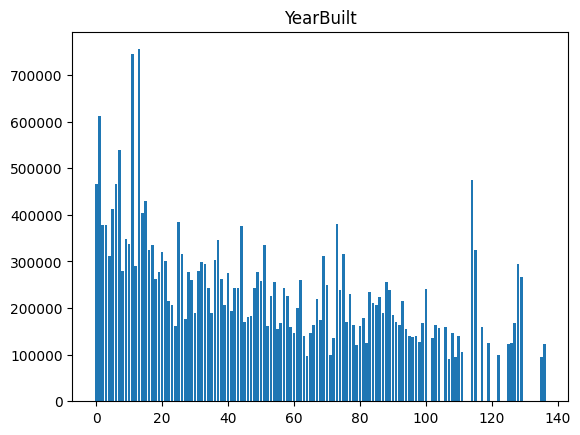

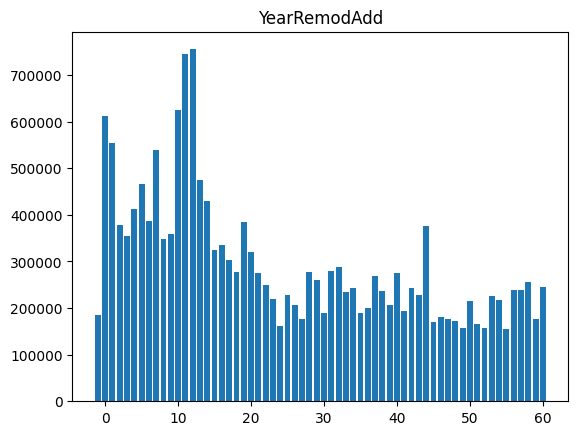

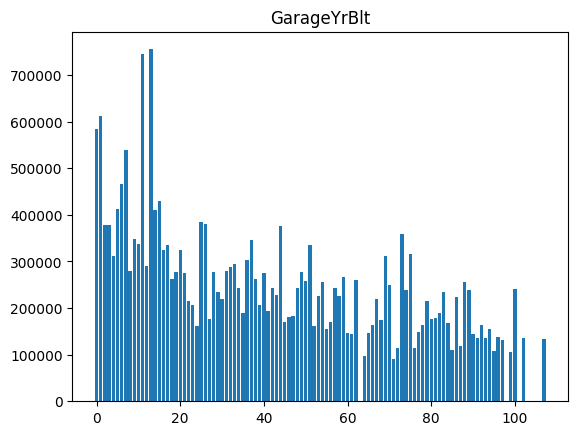

In [14]:
for feature in year_features:
    if feature != "YrSold":
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.bar(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()
        #house price is more for the house which is recently built and sold

In [15]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold']

In [16]:
df[discrete_features].head() #17 discrete features

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MoSold  
0           0           2          0         0       2  
1           1           2          0         0       5  
2           1           2          0         0       9  
3           1           3          0         0       2  
4           1           3          0         0      12

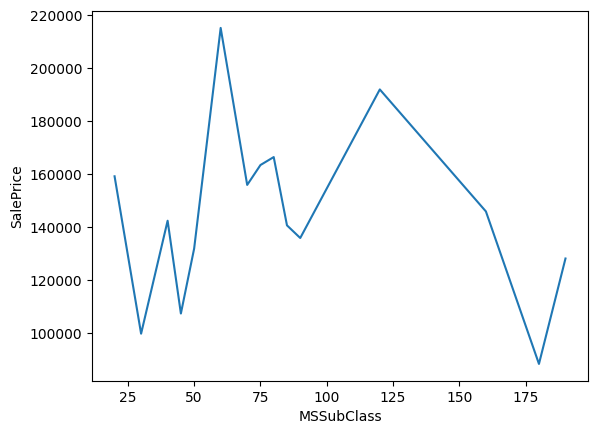

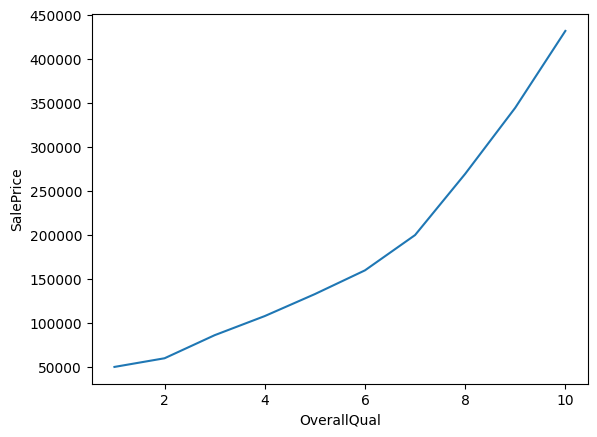

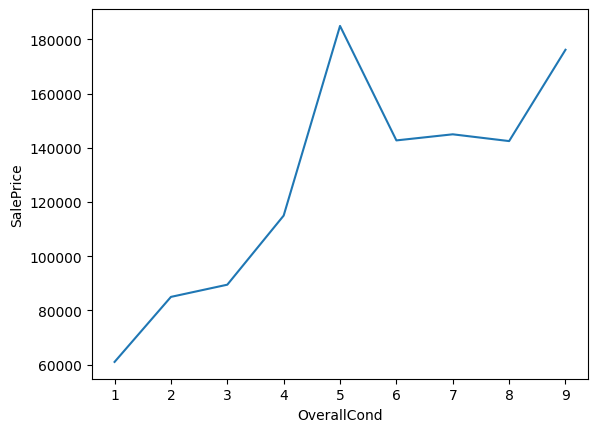

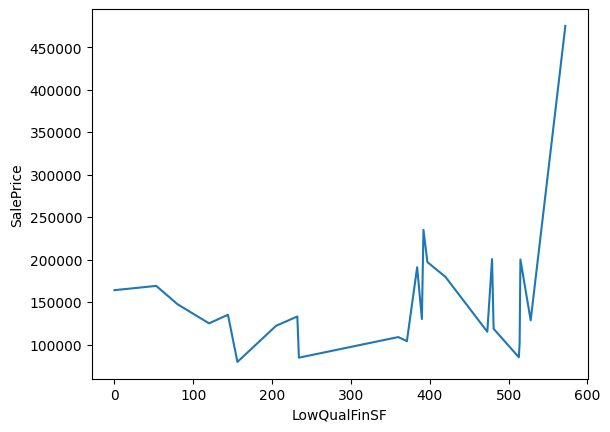

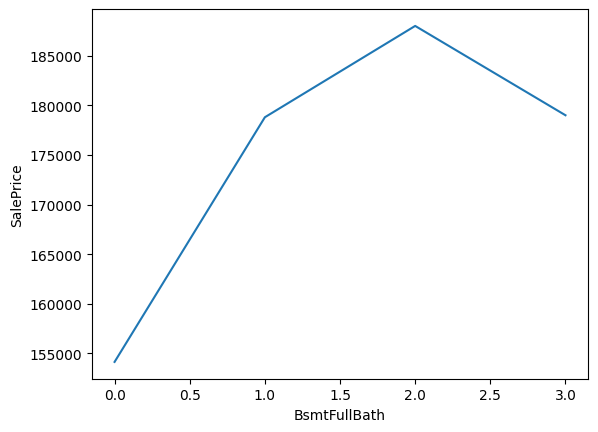

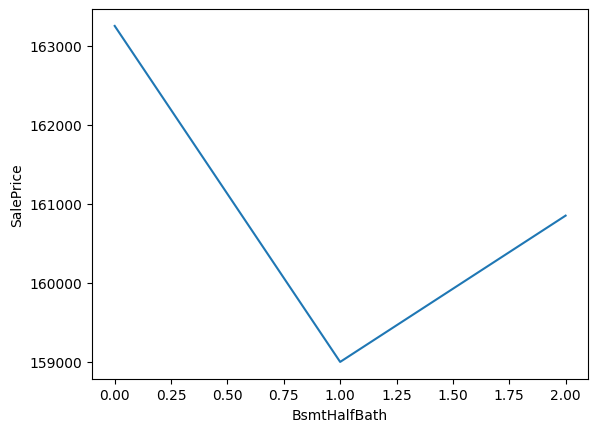

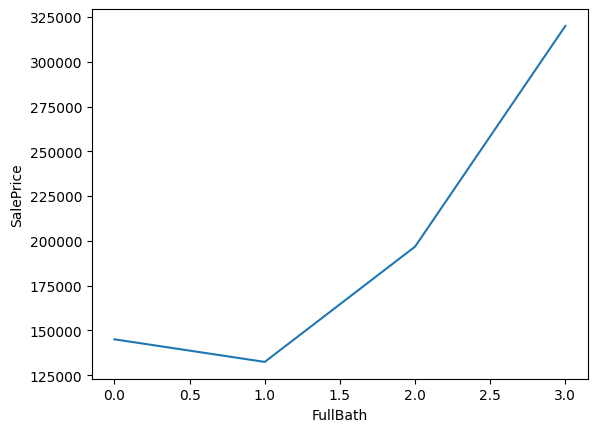

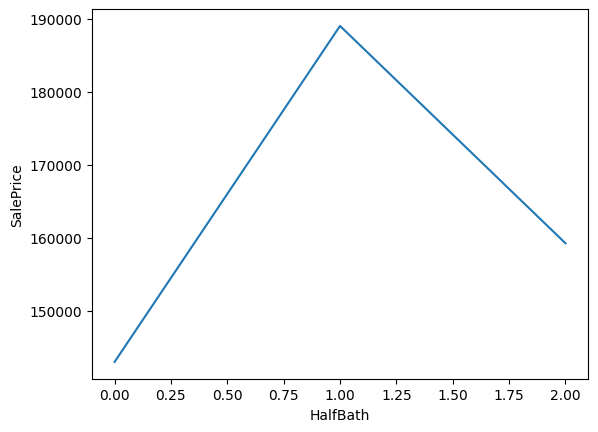

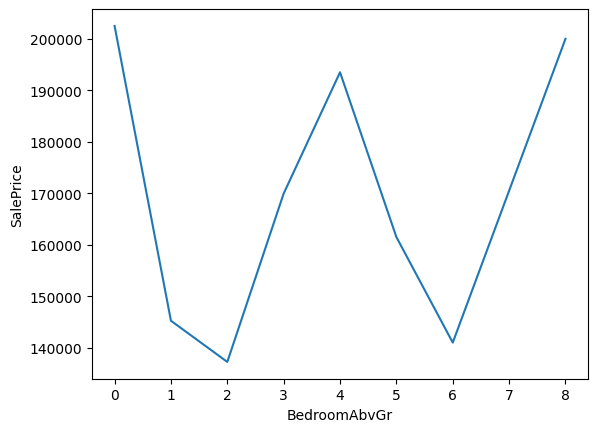

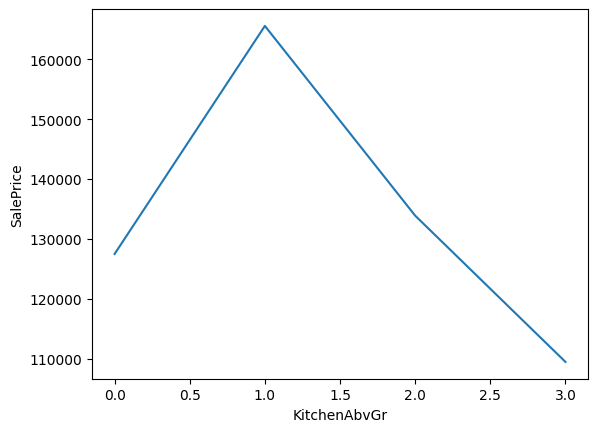

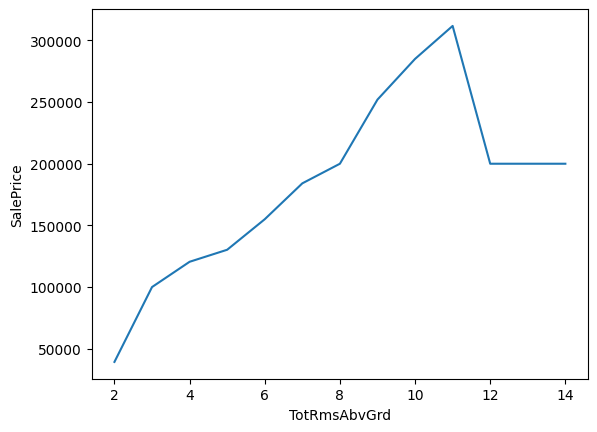

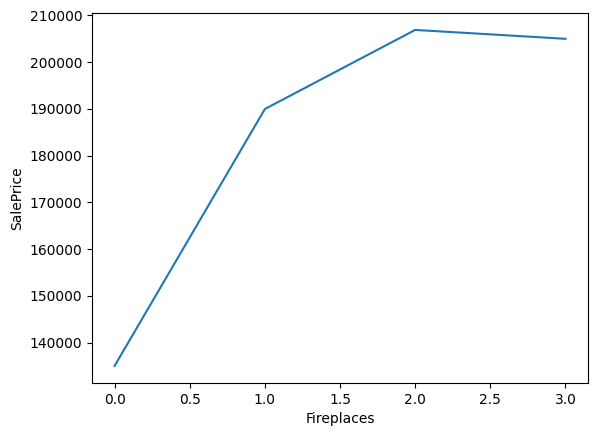

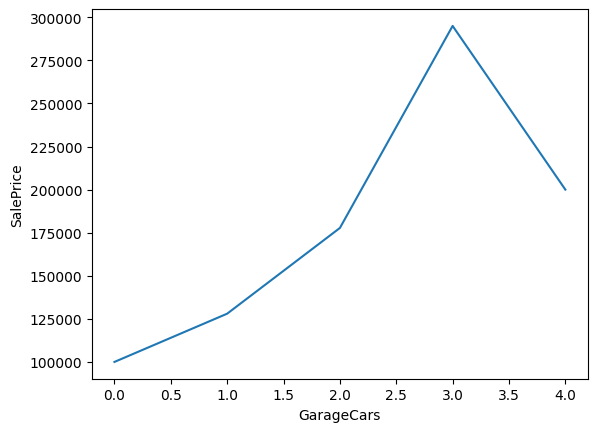

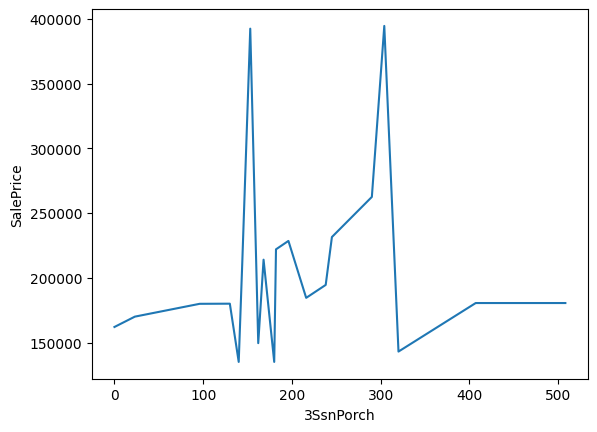

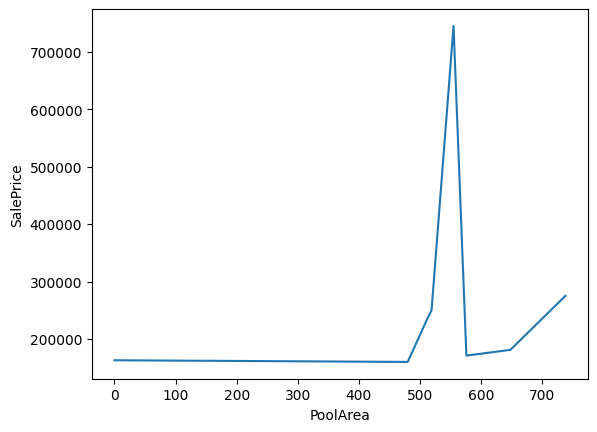

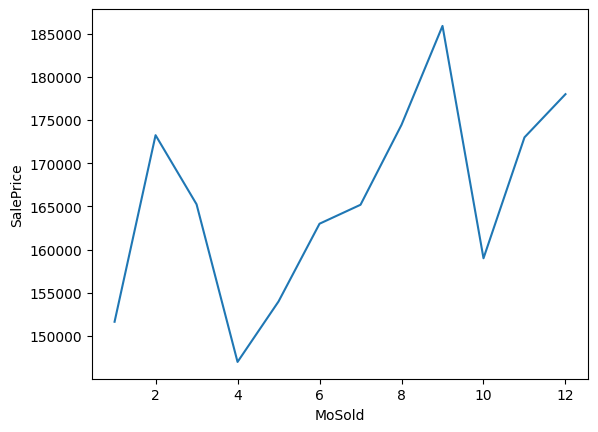

In [17]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.line()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show() #relation of discrete var w sales

In [18]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

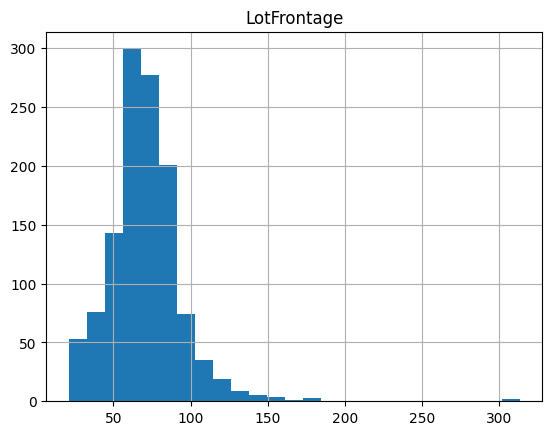

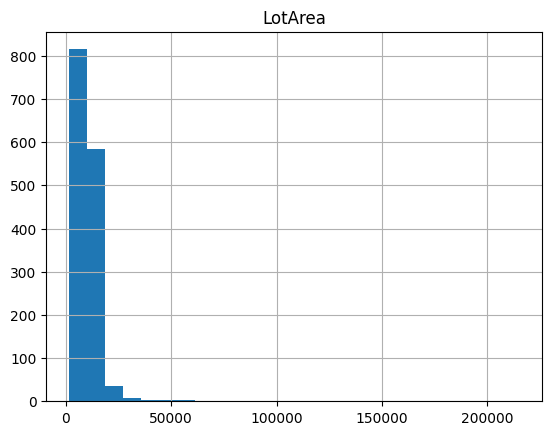

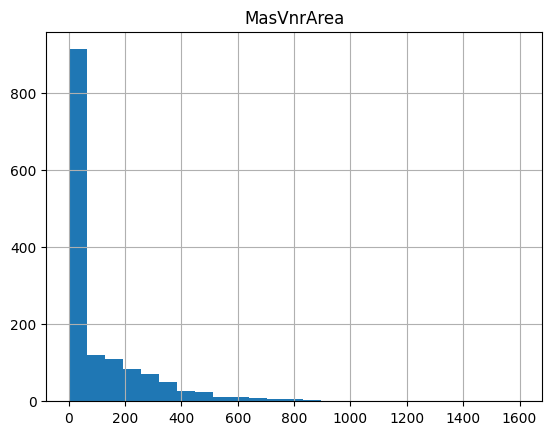

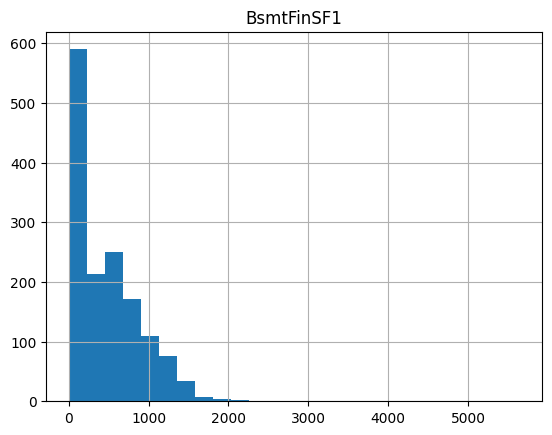

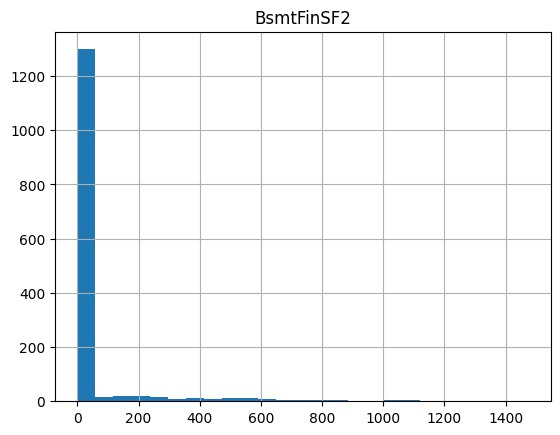

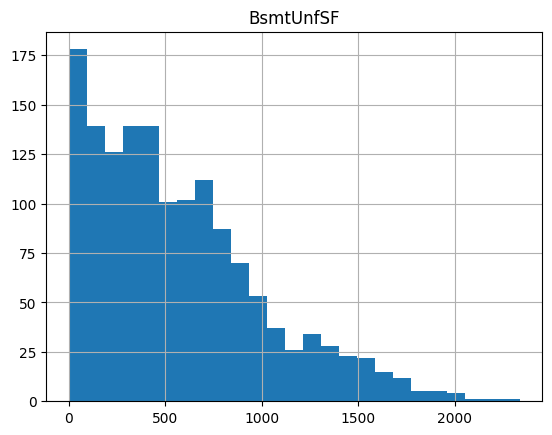

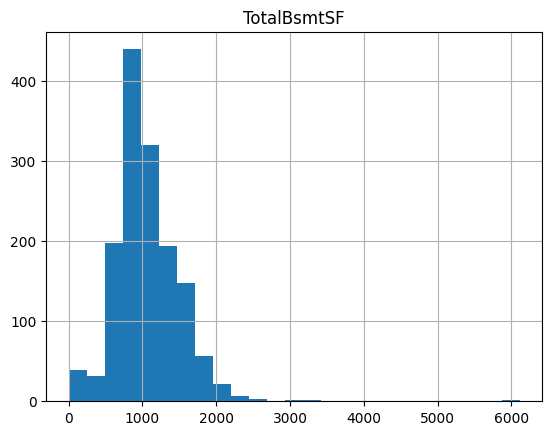

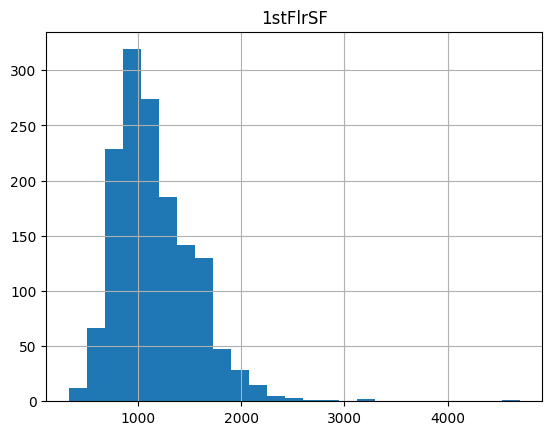

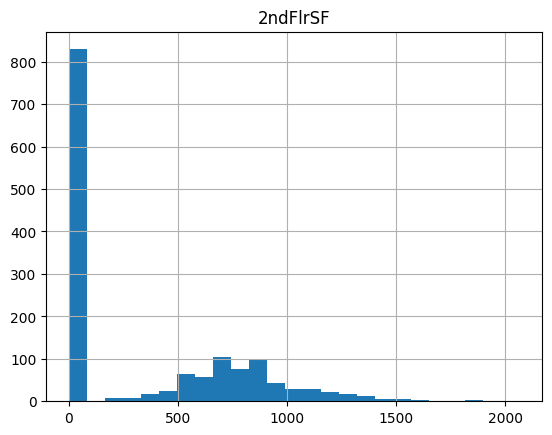

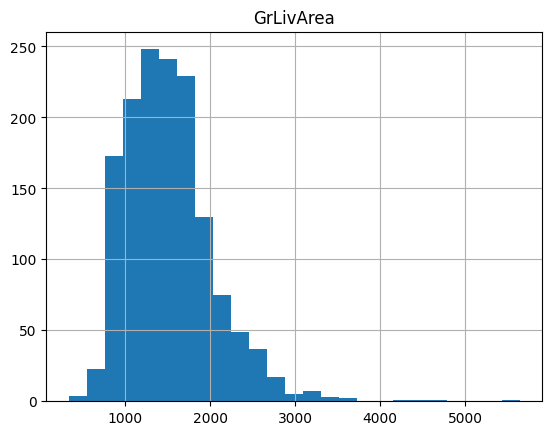

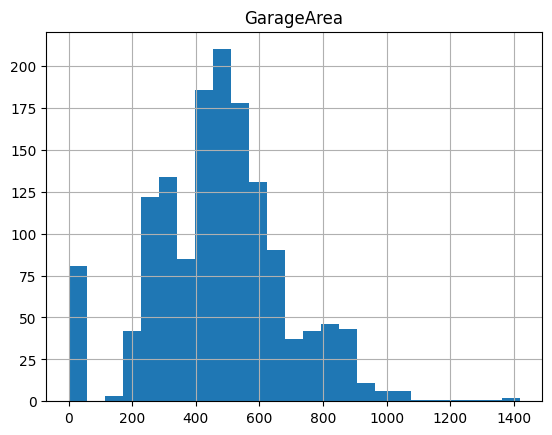

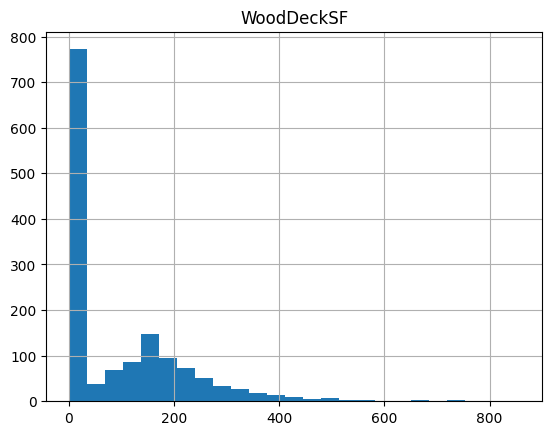

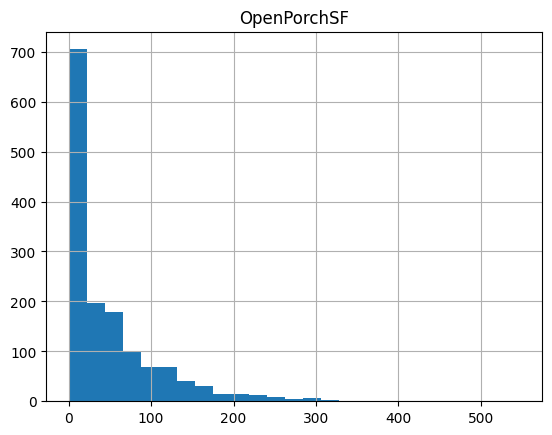

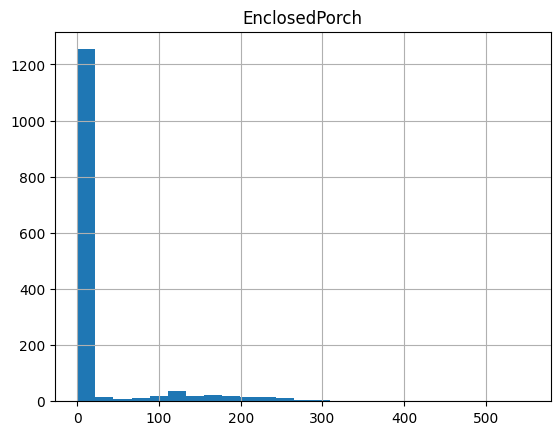

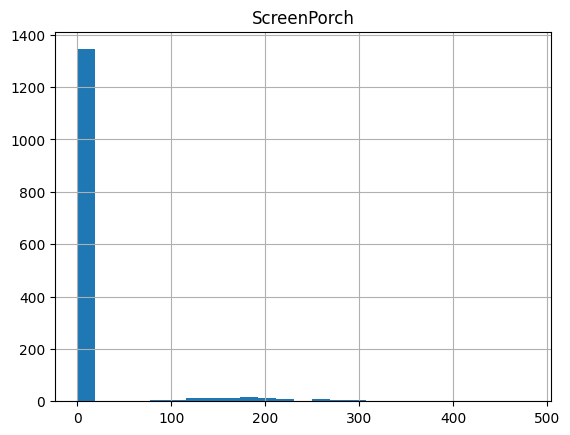

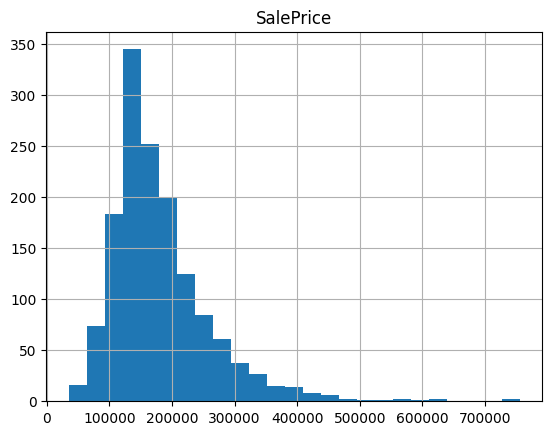

In [19]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)

    plt.show() #some featues are skewed ie data is collected on one side/ one sided data

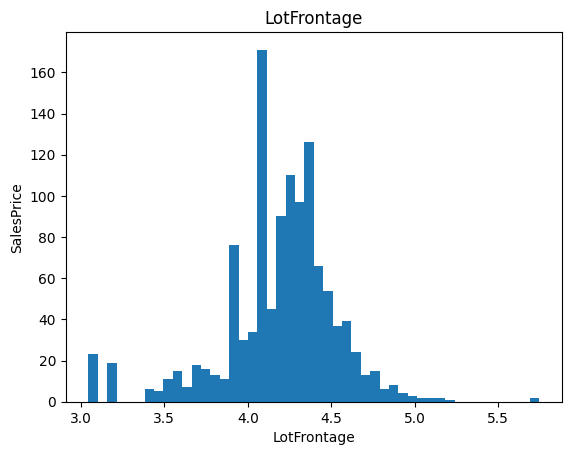

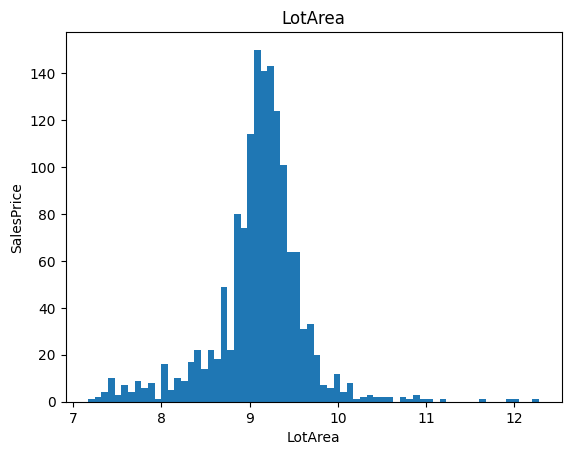

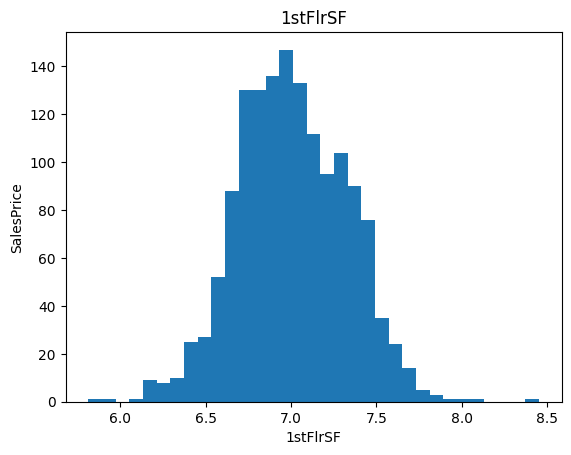

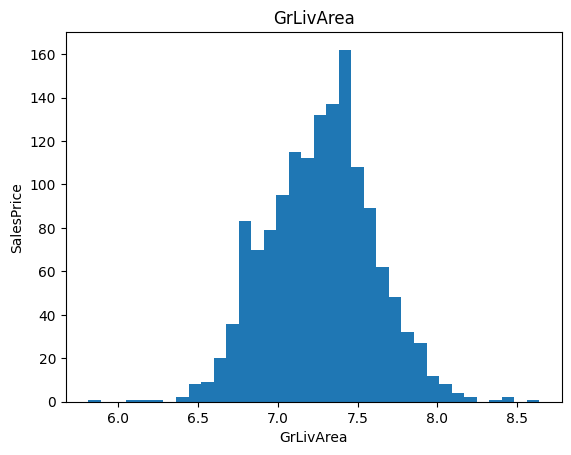

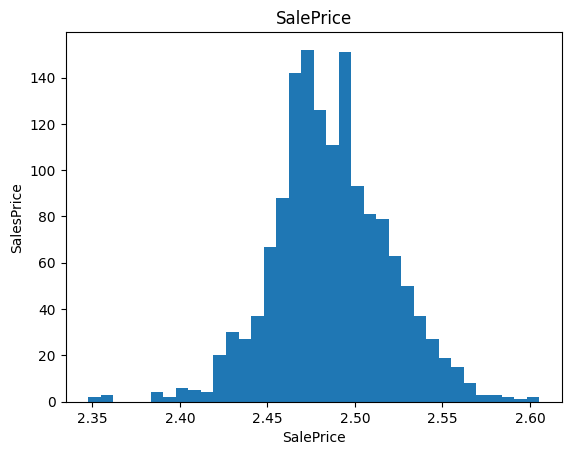

In [20]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        # Instead of using data['SalePrice'] as bins,
        # automatically generate bins using 'auto' or an integer:
        plt.hist(data[feature], bins='auto')  # or bins=20 for example
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [21]:
df[numerical_features].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0         706           0  ...         548   
1          1976         0.0         978           0  ...         460   
2          2002       162.0         486           0  ...         608   
3          1970         0.0         216           0  ...         642   
4          2000       350.0         655           0  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 36 columns]

In [22]:
 outlier_wo_year = df.drop(columns=year_features)
outlier_wo_year

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea  \
0            Lvl    AllPub    Inside  ...         0           0        0   
1            Lvl    AllPub       FR2  ...         0           0        0   
2            Lvl    AllPub    Inside  ...         0           0        0   
3            Lvl    AllPub    Corner  ...         0           0        0   
4            Lvl    AllPub       FR2  ...         0           0        0   
...          ...       ...       ...  ...       ...         ...      ...   
1455         Lvl    AllPub    Inside  ...         0           0        0   
1456         Lvl    AllPub    Inside  ...         0           0        0   
1457         Lvl    AllPub    Inside  ...         0           0        0   
1458         Lvl    AllPub    Inside  ...         0           0        0   
1459         Lvl    AllPub    Inside  ...         0           0        0   

     PoolQC  Fence MiscFeature  MoSold  SaleType SaleCondition SalePrice  
0       NaN    NaN         NaN       2        WD        Normal    208500  
1       NaN    NaN         NaN       5        WD        Normal    181500  
2       NaN    NaN         NaN       9        WD        Normal    223500  
3       NaN    NaN         NaN       2        WD       Abnorml    140000  
4       NaN    NaN         NaN      12        WD        Normal    250000  
...     ...    ...         ...     ...       ...           ...       ...  
1455    NaN    NaN         NaN       8        WD        Normal    175000  
1456    NaN  MnPrv         NaN       2        WD        Normal    210000  
1457    NaN  GdPrv        Shed       5        WD        Normal    266500  
1458    NaN    NaN         NaN       4        WD        Normal    142125  
1459    NaN    NaN         NaN       6        WD        Normal    147500  

[1460 rows x 75 columns]

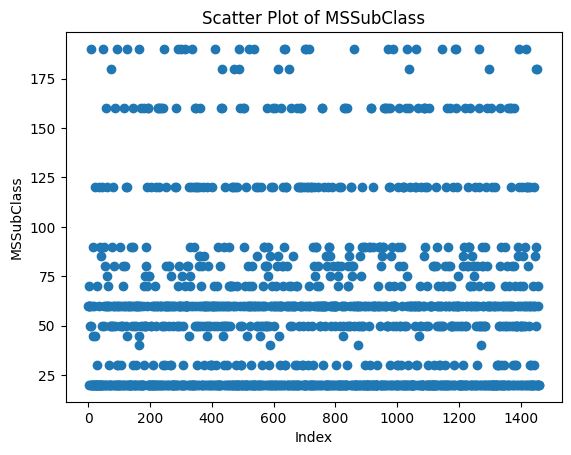

Skipping scatter plot for column 'MSZoning' because it's not numerical.


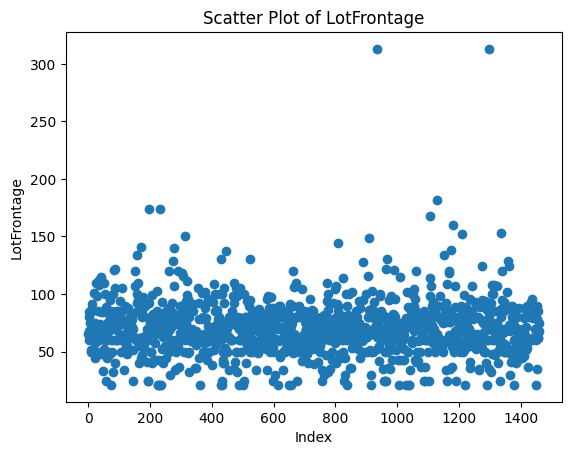

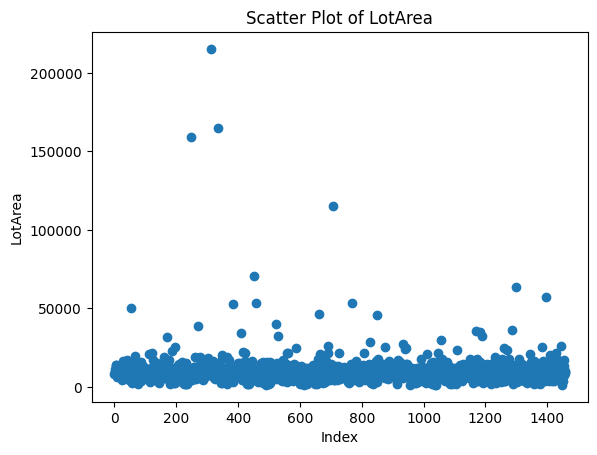

Skipping scatter plot for column 'Street' because it's not numerical.
Skipping scatter plot for column 'Alley' because it's not numerical.
Skipping scatter plot for column 'LotShape' because it's not numerical.
Skipping scatter plot for column 'LandContour' because it's not numerical.
Skipping scatter plot for column 'Utilities' because it's not numerical.
Skipping scatter plot for column 'LotConfig' because it's not numerical.
Skipping scatter plot for column 'LandSlope' because it's not numerical.
Skipping scatter plot for column 'Neighborhood' because it's not numerical.
Skipping scatter plot for column 'Condition1' because it's not numerical.
Skipping scatter plot for column 'Condition2' because it's not numerical.
Skipping scatter plot for column 'BldgType' because it's not numerical.
Skipping scatter plot for column 'HouseStyle' because it's not numerical.


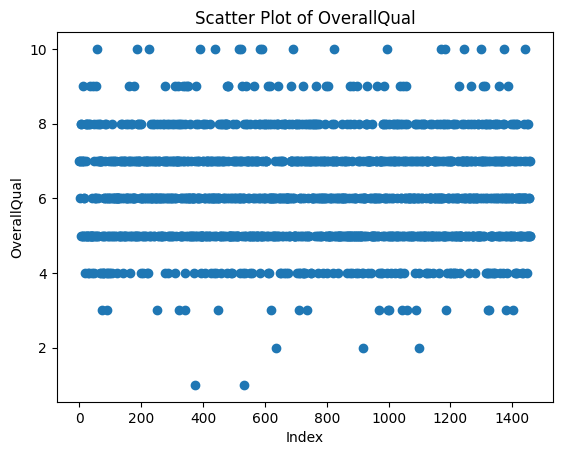

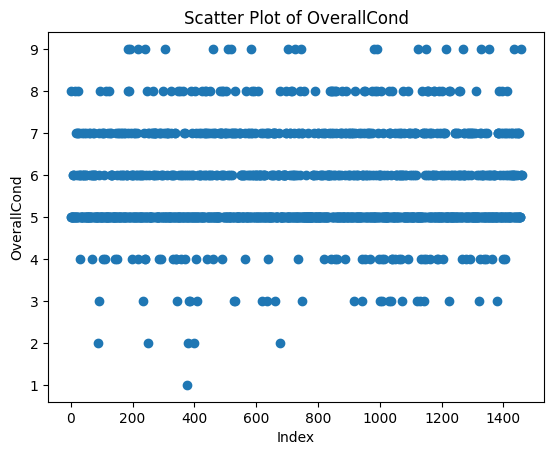

Skipping scatter plot for column 'RoofStyle' because it's not numerical.
Skipping scatter plot for column 'RoofMatl' because it's not numerical.
Skipping scatter plot for column 'Exterior1st' because it's not numerical.
Skipping scatter plot for column 'Exterior2nd' because it's not numerical.
Skipping scatter plot for column 'MasVnrType' because it's not numerical.


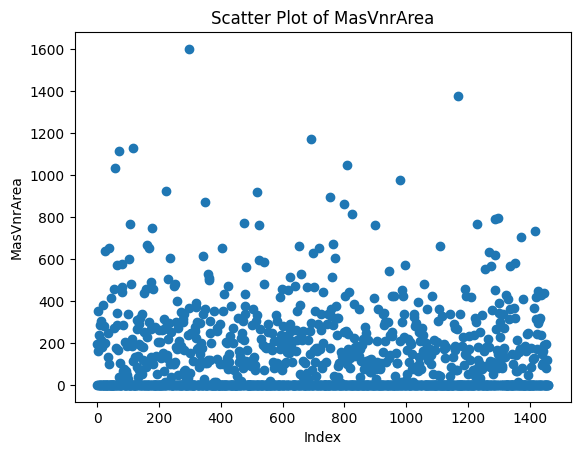

Skipping scatter plot for column 'ExterQual' because it's not numerical.
Skipping scatter plot for column 'ExterCond' because it's not numerical.
Skipping scatter plot for column 'Foundation' because it's not numerical.
Skipping scatter plot for column 'BsmtQual' because it's not numerical.
Skipping scatter plot for column 'BsmtCond' because it's not numerical.
Skipping scatter plot for column 'BsmtExposure' because it's not numerical.
Skipping scatter plot for column 'BsmtFinType1' because it's not numerical.


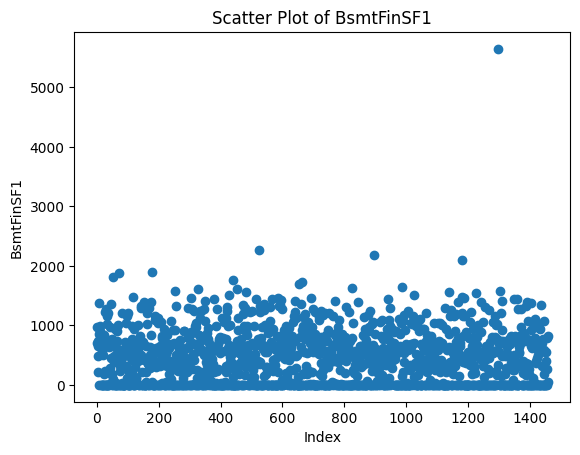

Skipping scatter plot for column 'BsmtFinType2' because it's not numerical.


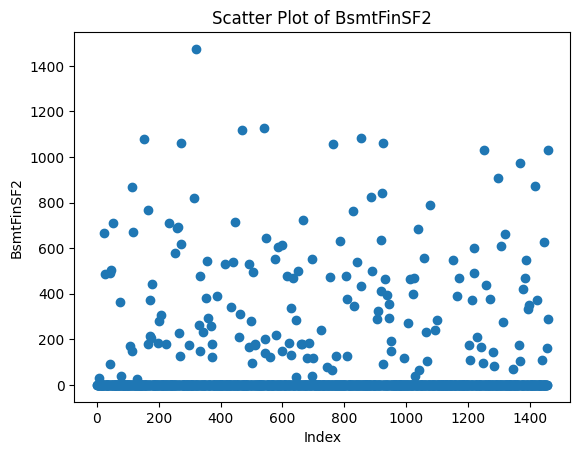

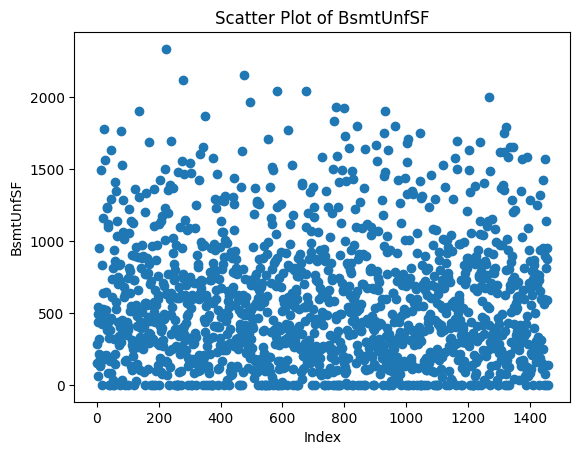

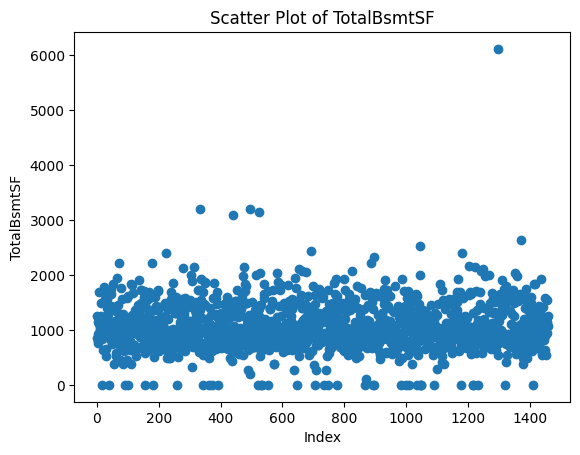

Skipping scatter plot for column 'Heating' because it's not numerical.
Skipping scatter plot for column 'HeatingQC' because it's not numerical.
Skipping scatter plot for column 'CentralAir' because it's not numerical.
Skipping scatter plot for column 'Electrical' because it's not numerical.


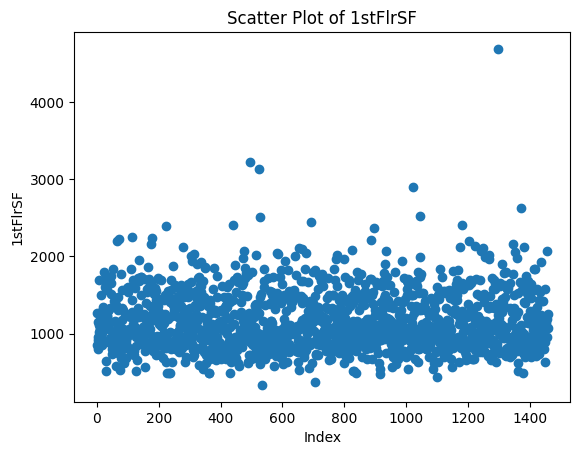

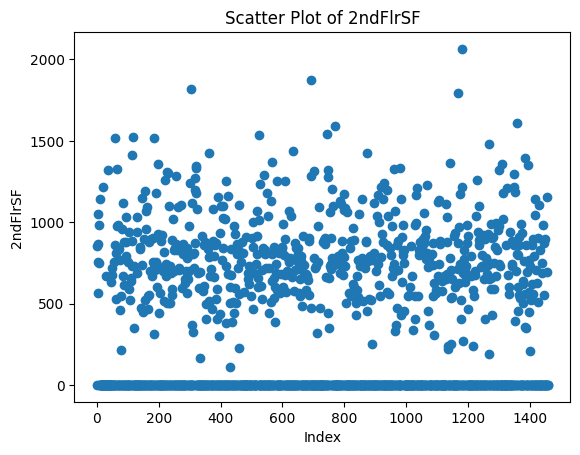

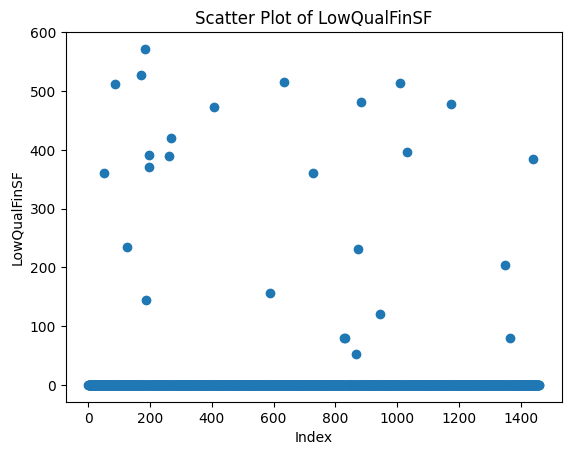

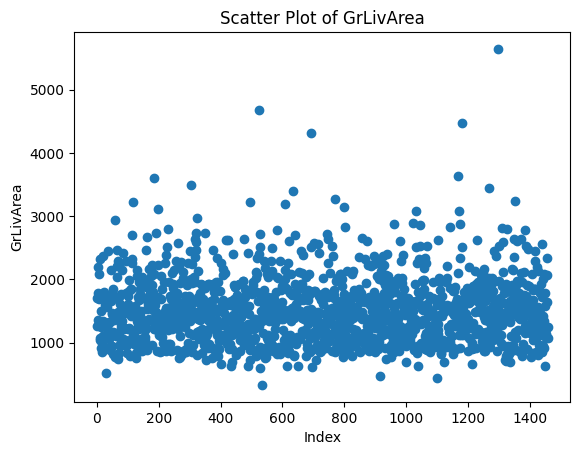

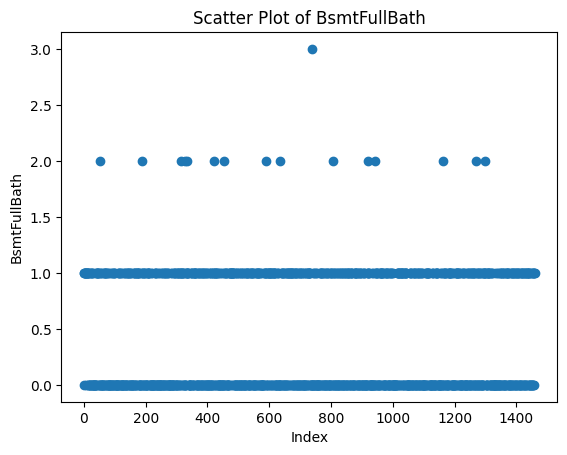

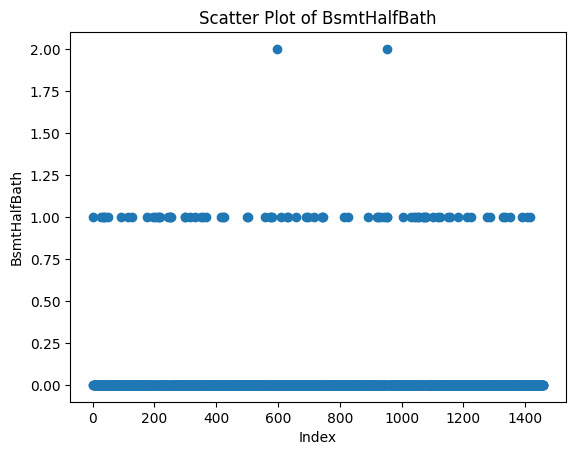

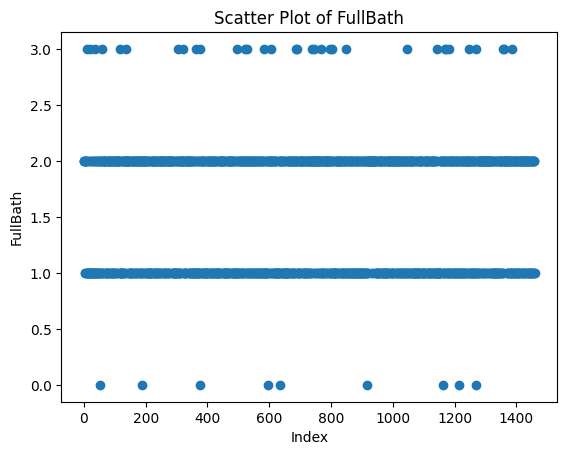

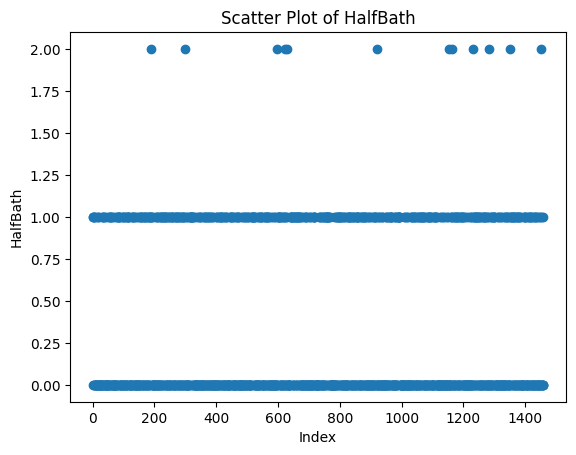

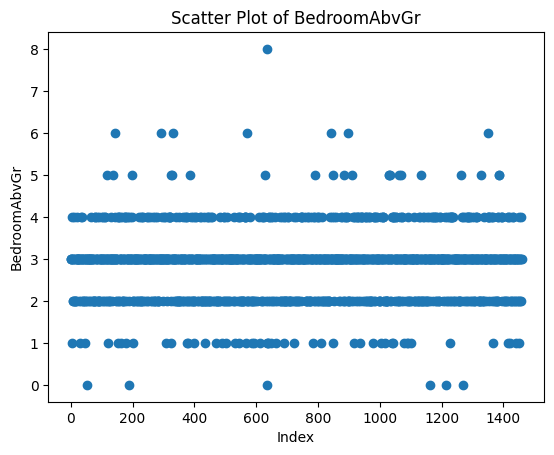

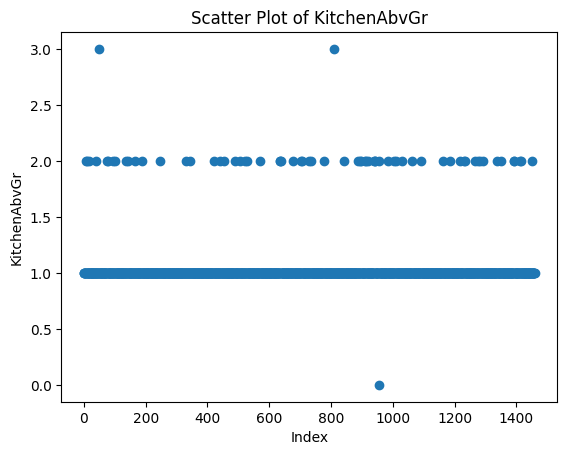

Skipping scatter plot for column 'KitchenQual' because it's not numerical.


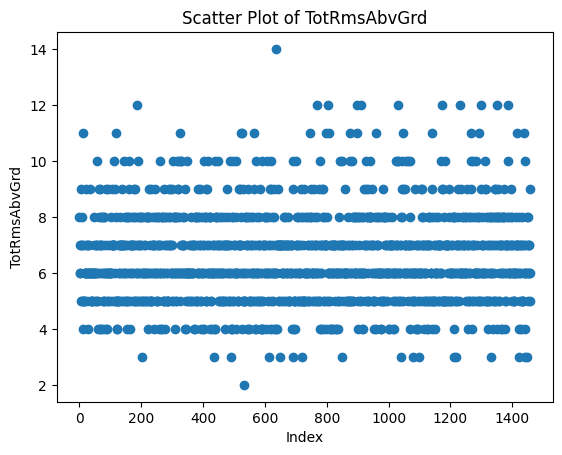

Skipping scatter plot for column 'Functional' because it's not numerical.


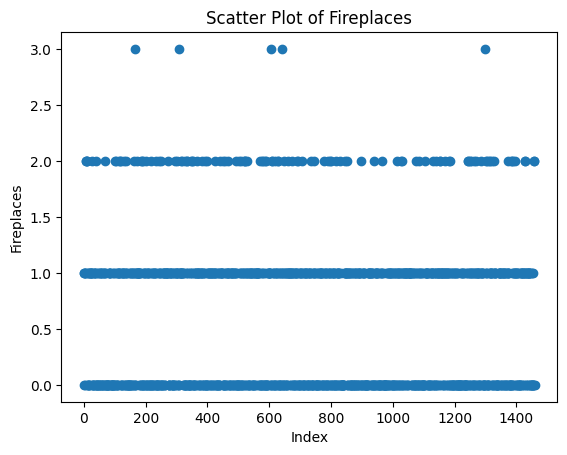

Skipping scatter plot for column 'FireplaceQu' because it's not numerical.
Skipping scatter plot for column 'GarageType' because it's not numerical.
Skipping scatter plot for column 'GarageFinish' because it's not numerical.


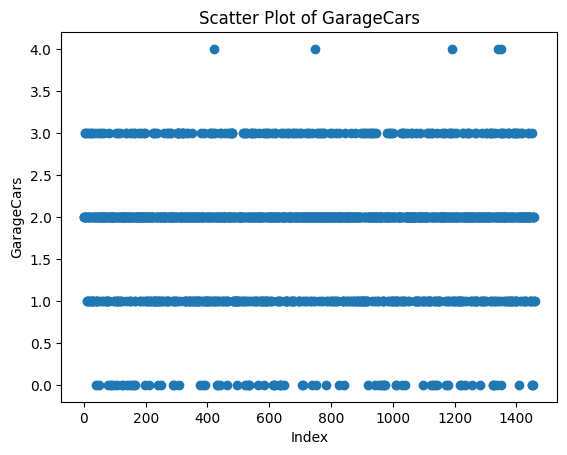

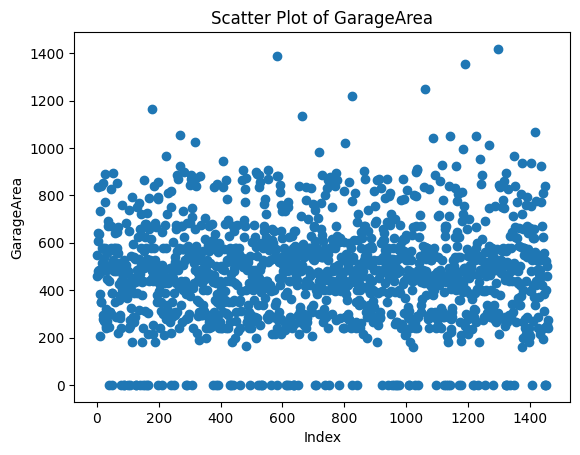

Skipping scatter plot for column 'GarageQual' because it's not numerical.
Skipping scatter plot for column 'GarageCond' because it's not numerical.
Skipping scatter plot for column 'PavedDrive' because it's not numerical.


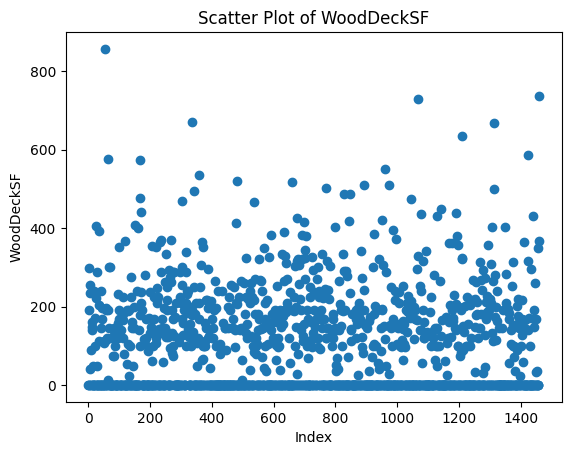

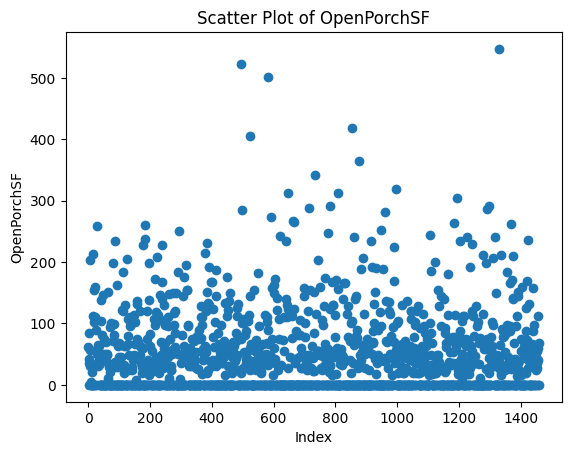

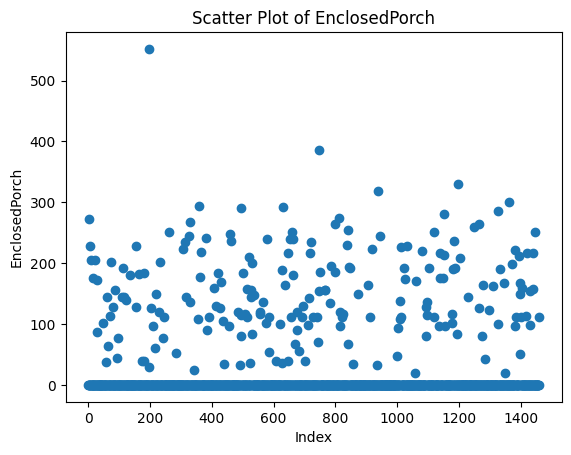

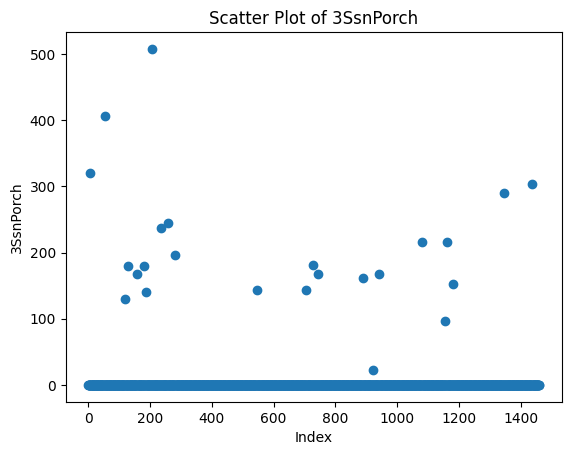

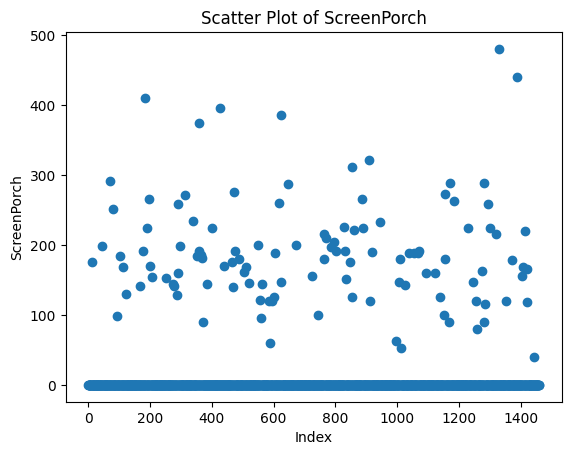

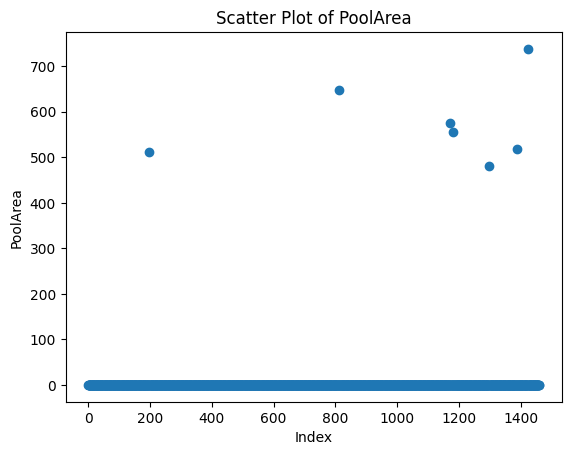

Skipping scatter plot for column 'PoolQC' because it's not numerical.
Skipping scatter plot for column 'Fence' because it's not numerical.
Skipping scatter plot for column 'MiscFeature' because it's not numerical.


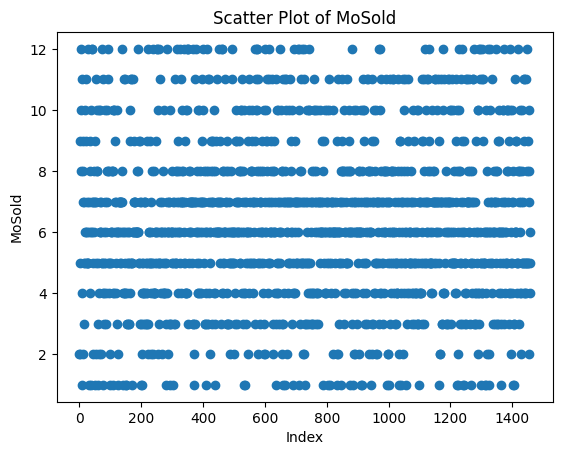

Skipping scatter plot for column 'SaleType' because it's not numerical.
Skipping scatter plot for column 'SaleCondition' because it's not numerical.


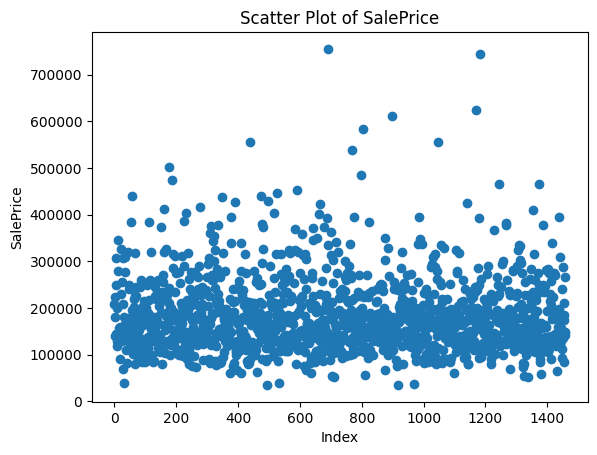

In [23]:
for i in outlier_wo_year.columns:
  if outlier_wo_year[i].dtype in [np.float64, np.int64]: # checks if column dtype is numerical
    plt.scatter(outlier_wo_year.index, outlier_wo_year[i])
    plt.xlabel("Index")
    plt.ylabel(i)  # Label the y-axis with the column name
    plt.title(f"Scatter Plot of {i}")
    plt.show()
  else: # handles non-numerical columns
    print(f"Skipping scatter plot for column '{i}' because it's not numerical.") # prints a skip message

In [24]:
categorical_features =[feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(df[feature].unique())))

Distinct categories for MSZoning  are 5
Distinct categories for Street  are 2
Distinct categories for Alley  are 3
Distinct categories for LotShape  are 4
Distinct categories for LandContour  are 4
Distinct categories for Utilities  are 2
Distinct categories for LotConfig  are 5
Distinct categories for LandSlope  are 3
Distinct categories for Neighborhood  are 25
Distinct categories for Condition1  are 9
Distinct categories for Condition2  are 8
Distinct categories for BldgType  are 5
Distinct categories for HouseStyle  are 8
Distinct categories for RoofStyle  are 6
Distinct categories for RoofMatl  are 8
Distinct categories for Exterior1st  are 15
Distinct categories for Exterior2nd  are 16
Distinct categories for MasVnrType  are 4
Distinct categories for ExterQual  are 4
Distinct categories for ExterCond  are 5
Distinct categories for Foundation  are 6
Distinct categories for BsmtQual  are 5
Distinct categories for BsmtCond  are 5
Distinct categories for BsmtExposure  are 5
Distinct 

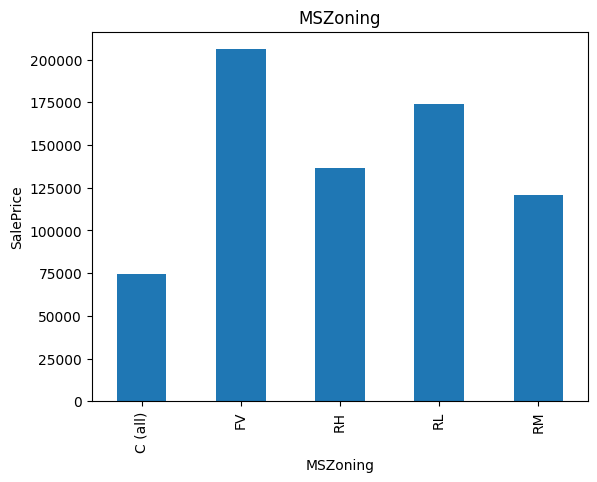

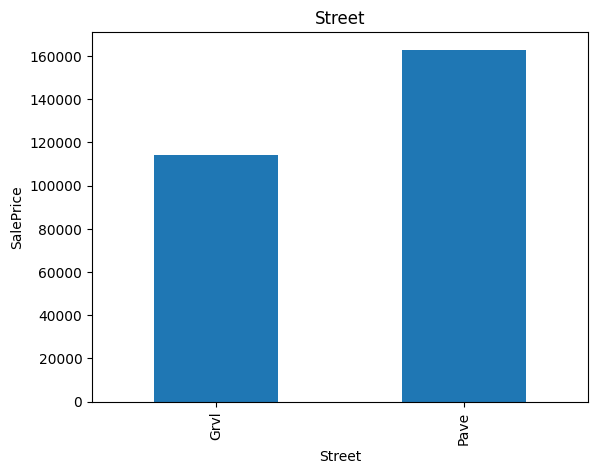

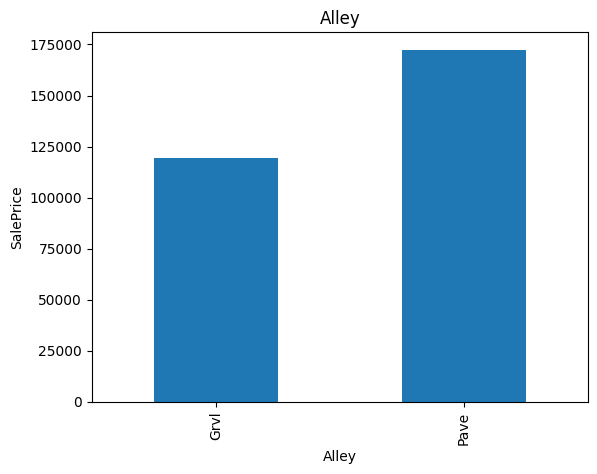

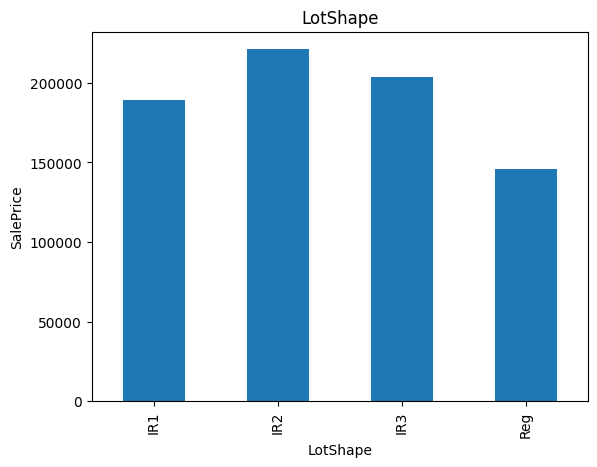

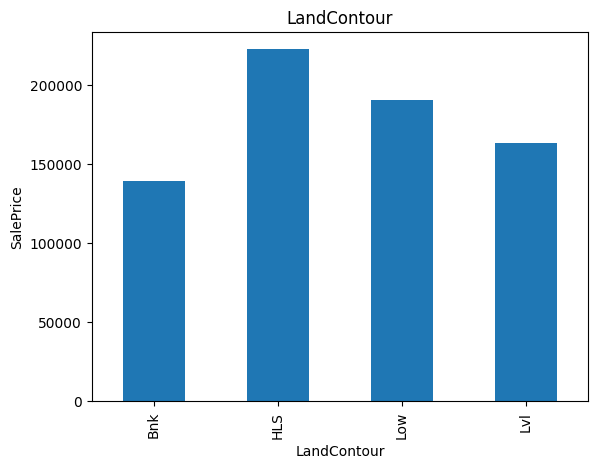

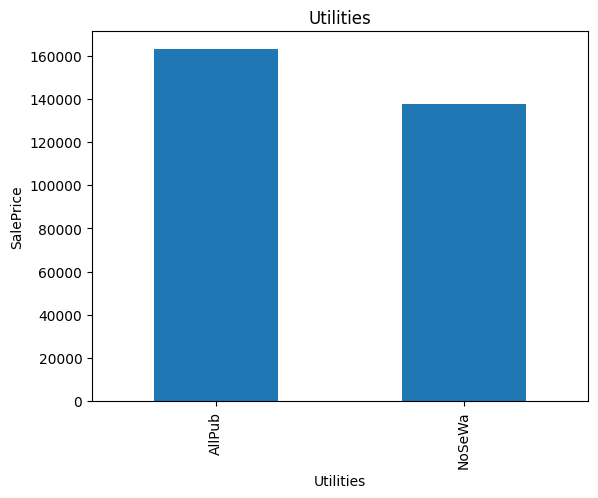

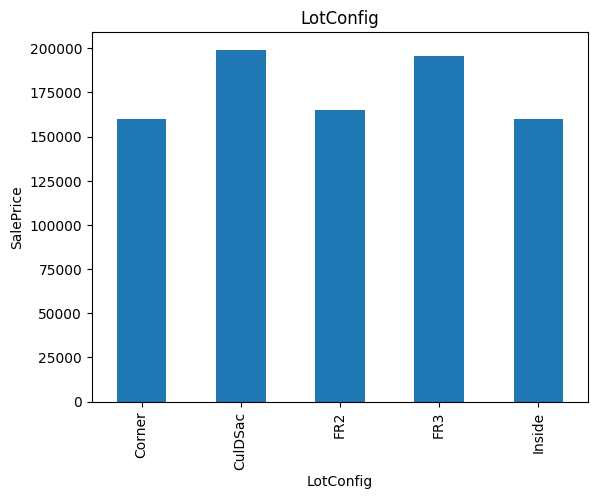

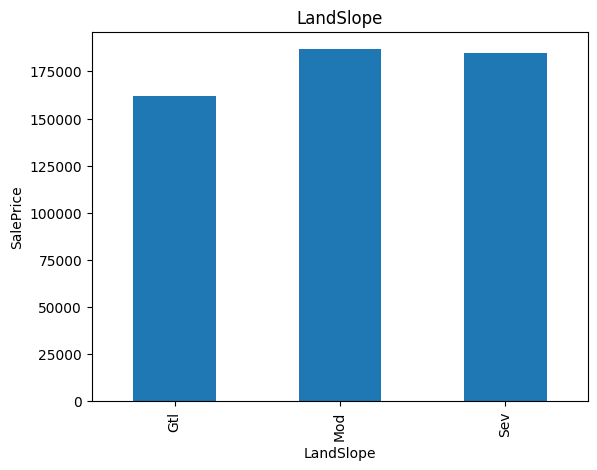

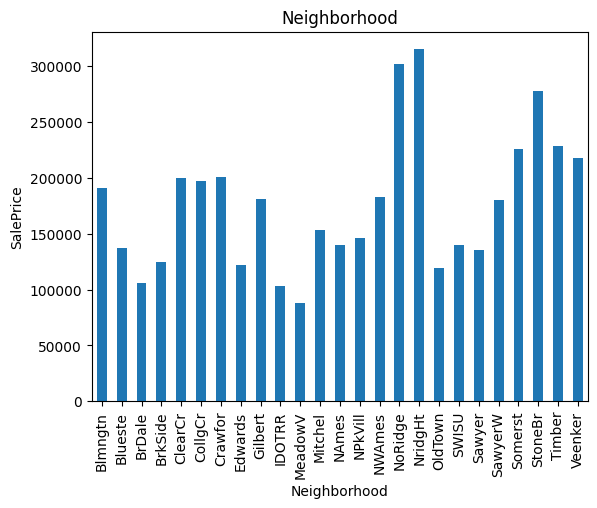

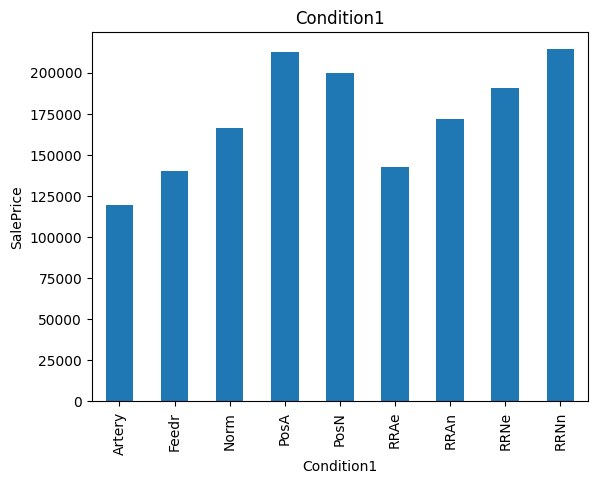

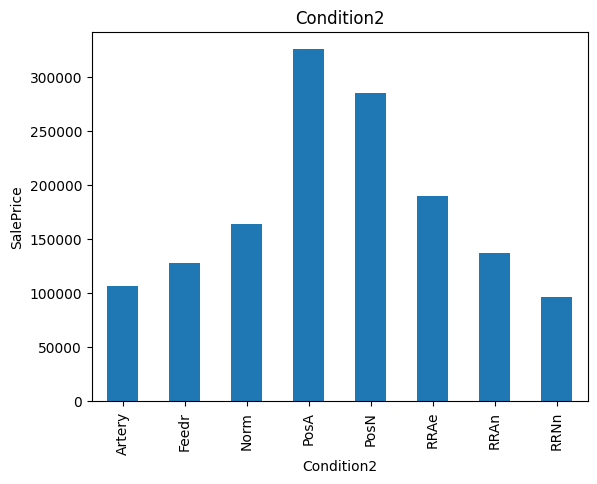

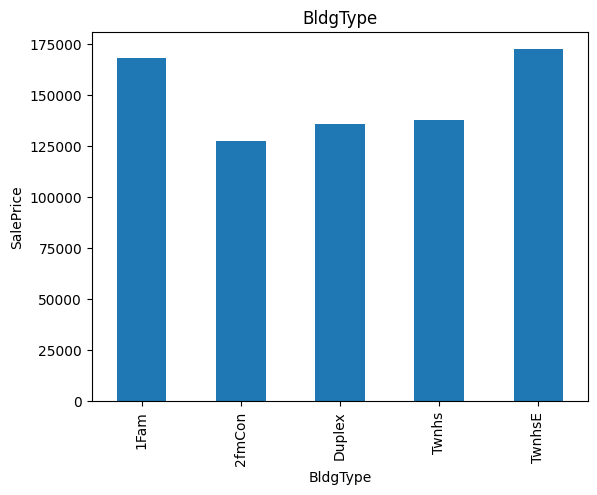

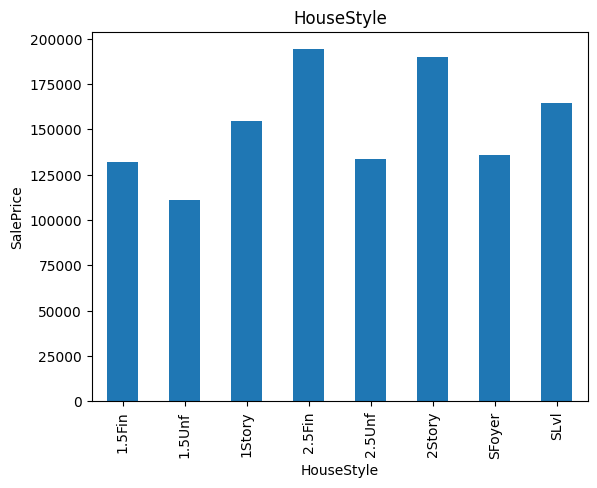

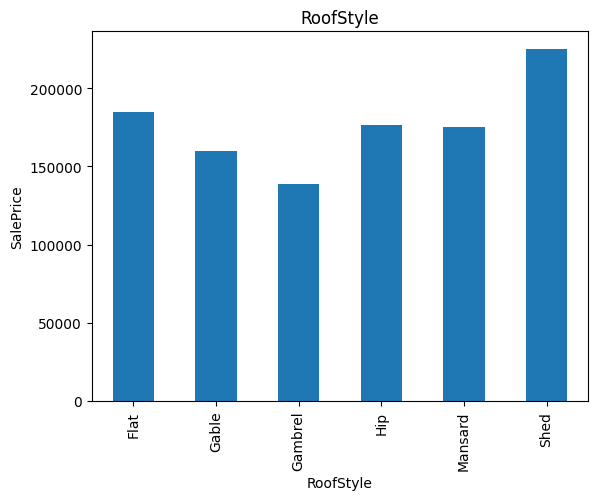

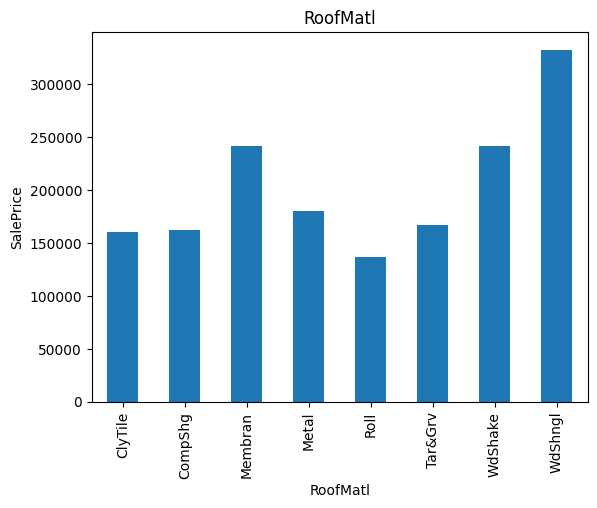

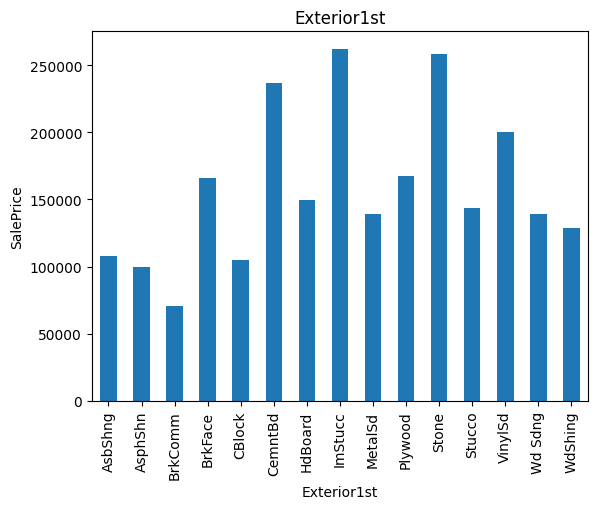

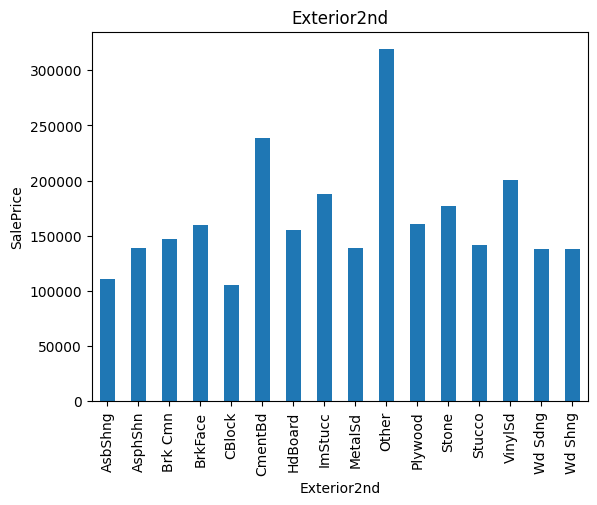

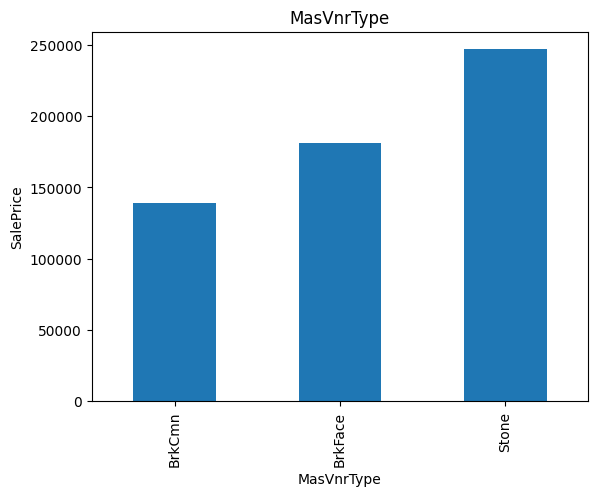

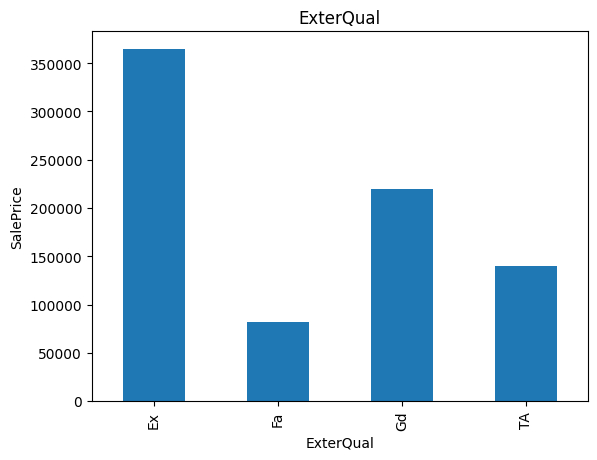

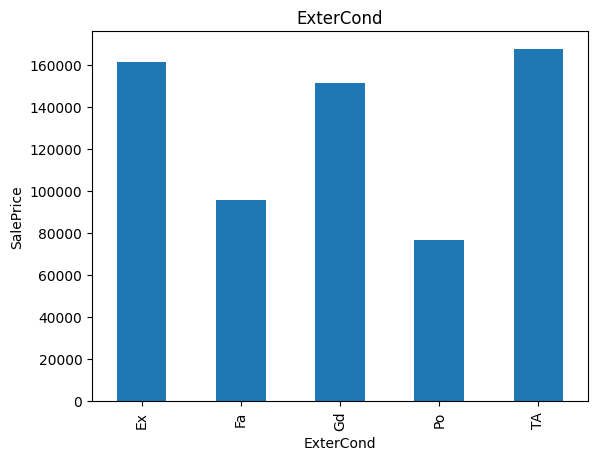

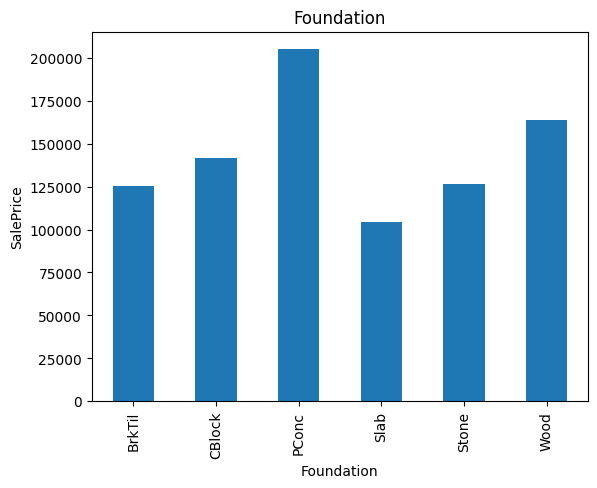

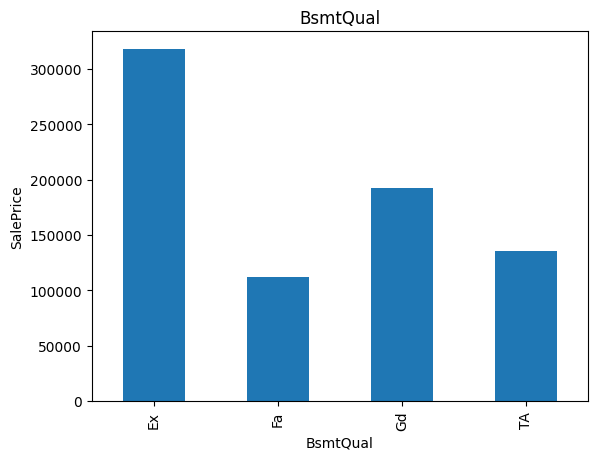

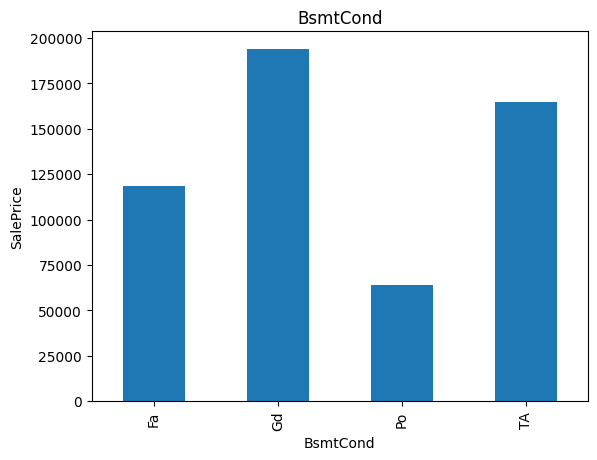

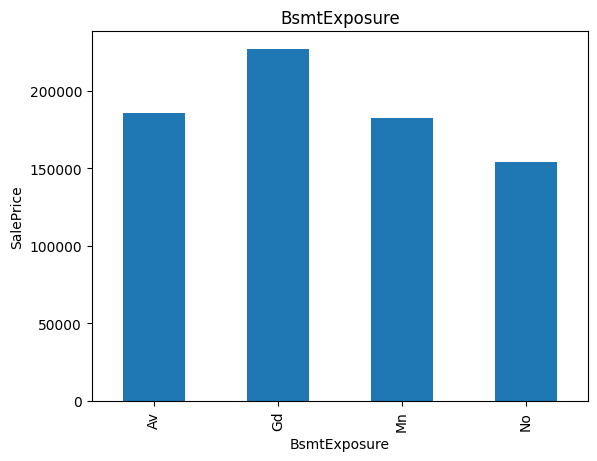

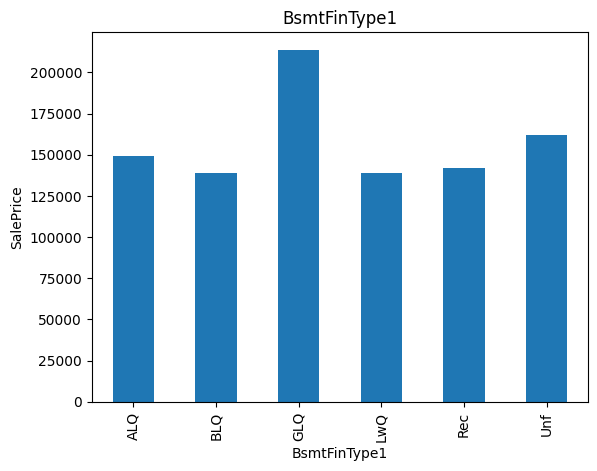

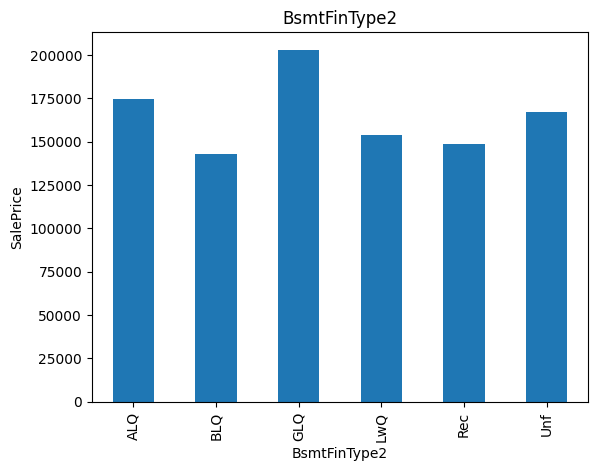

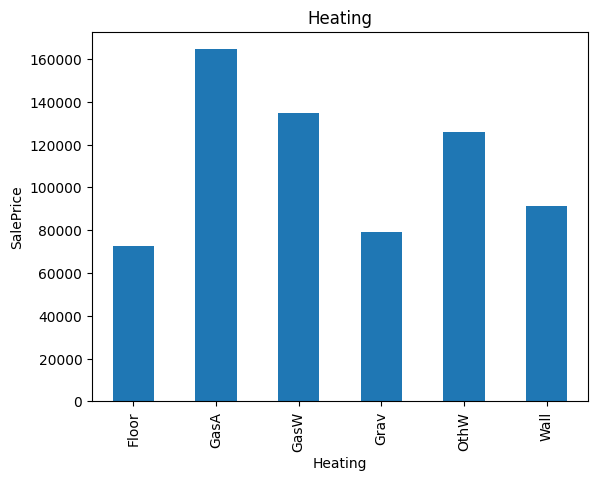

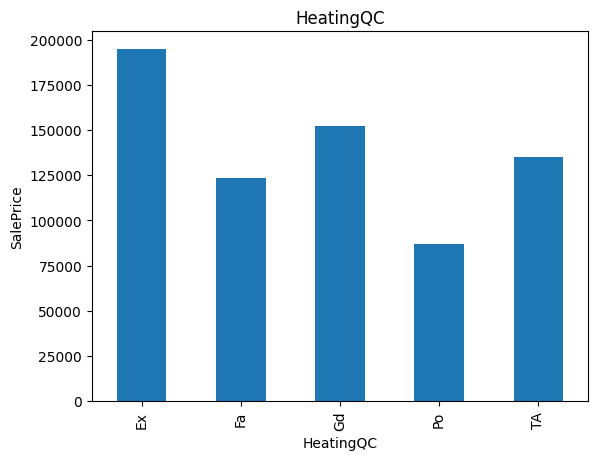

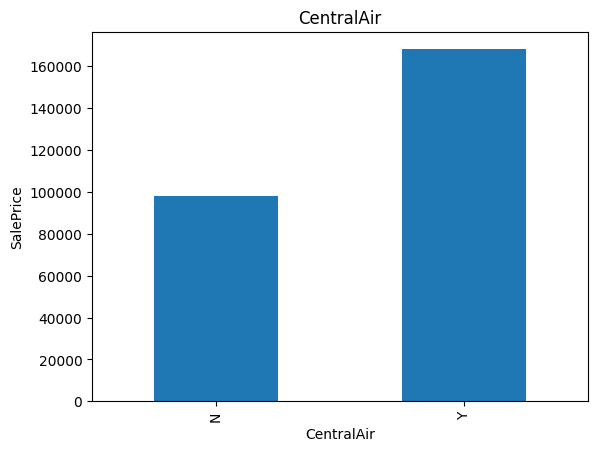

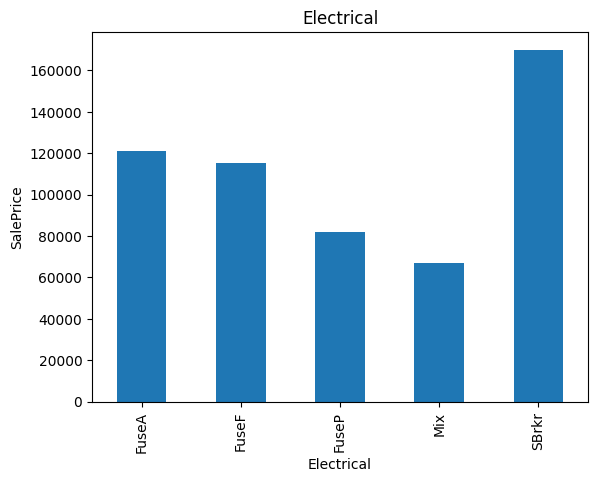

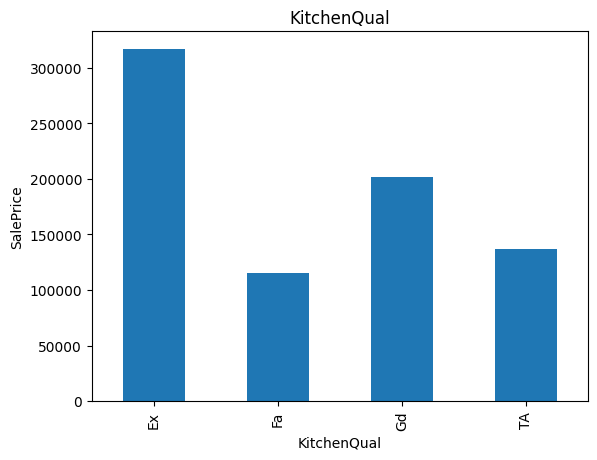

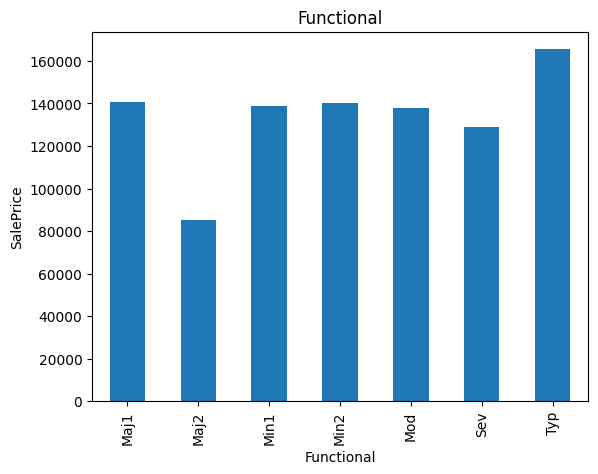

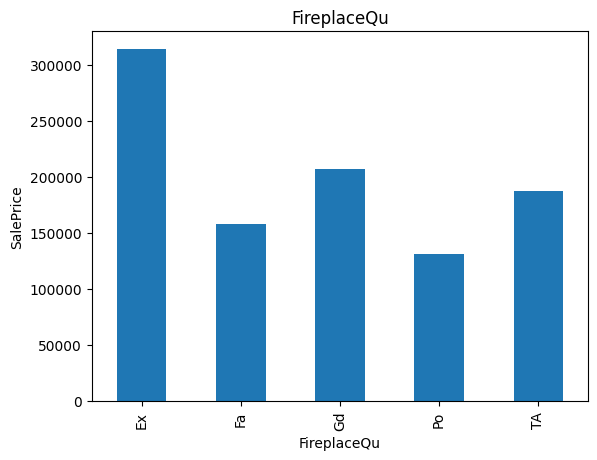

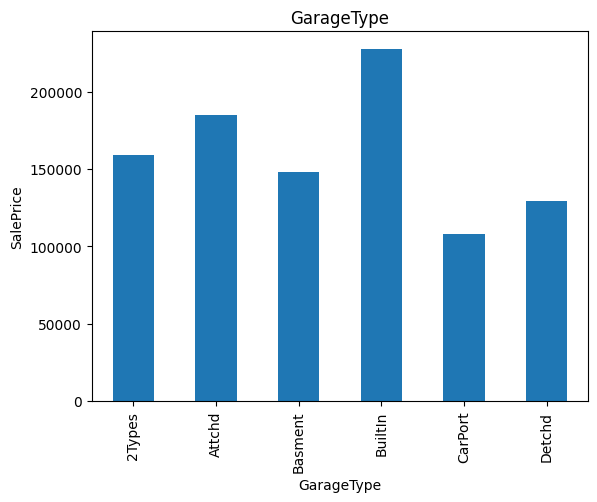

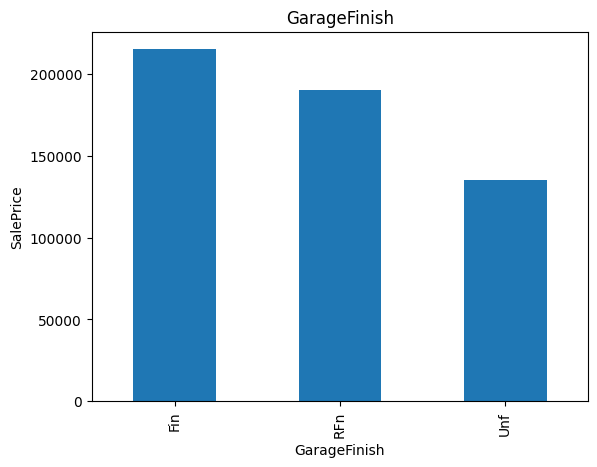

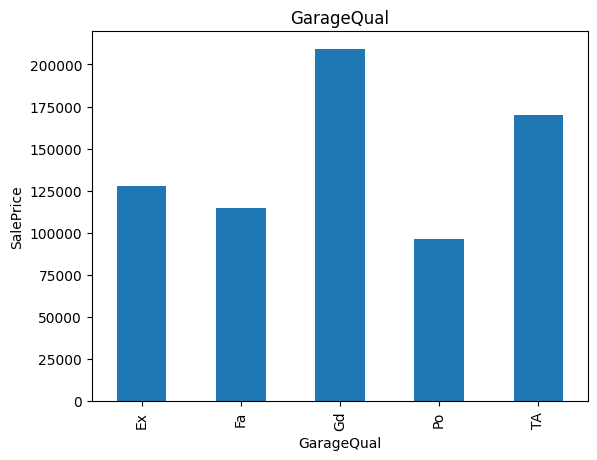

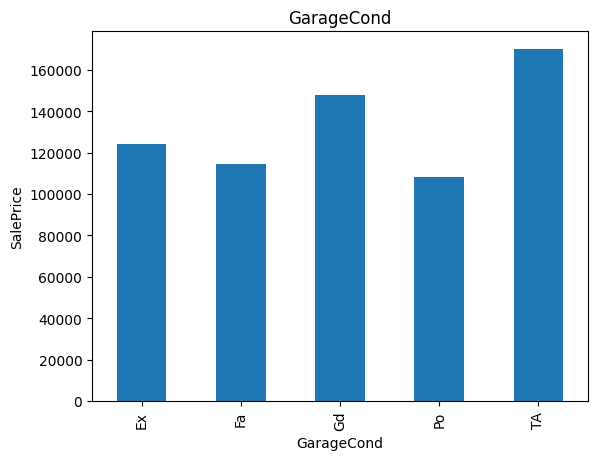

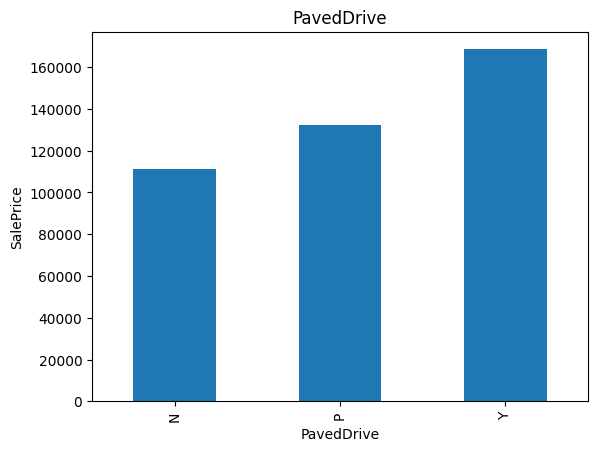

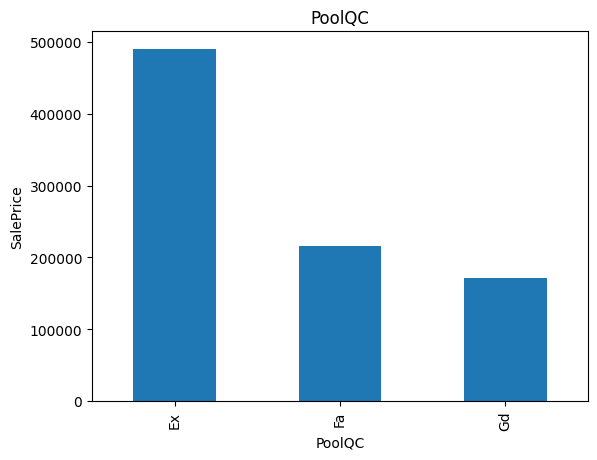

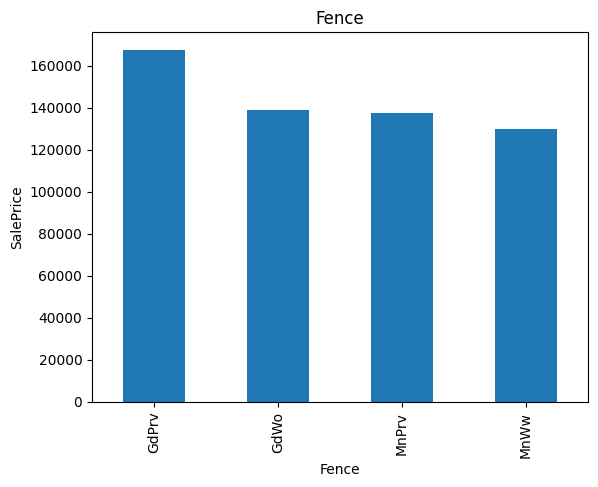

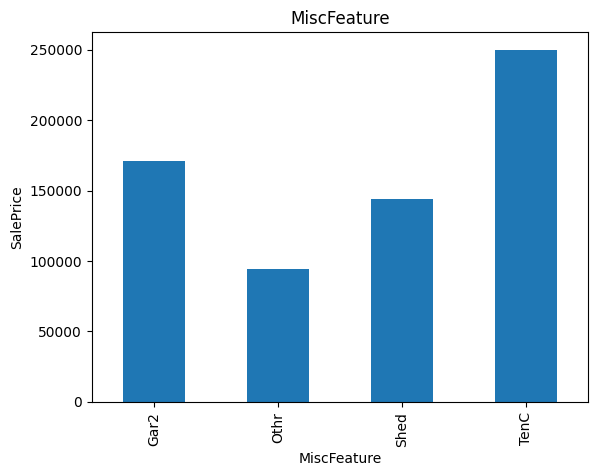

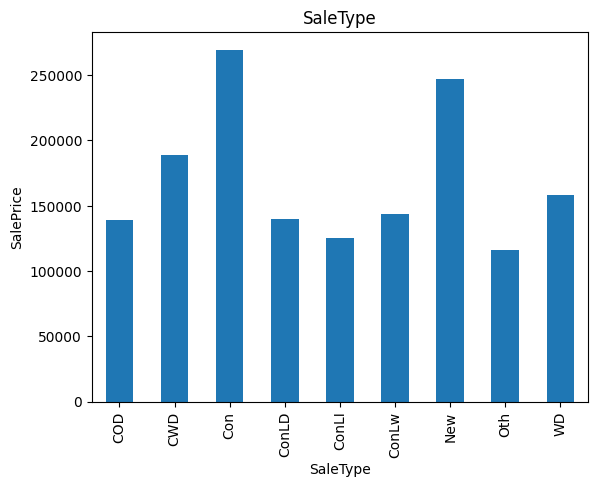

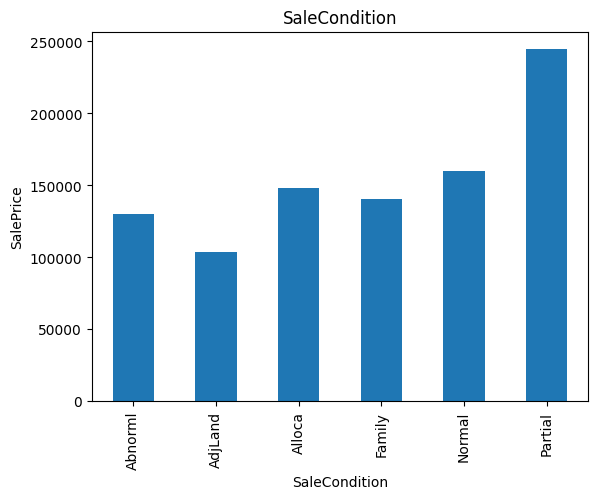

In [26]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [27]:
df_test.shape
df.shape

(1460, 79)

<Axes: >

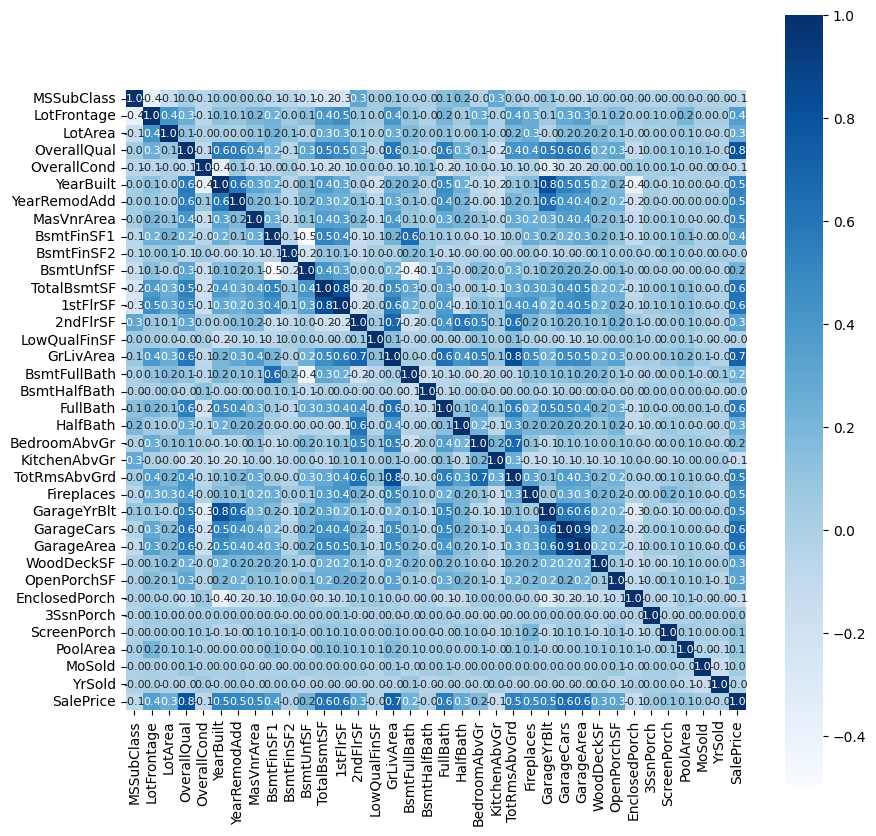

In [28]:
correl = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10,10))
sns.heatmap(correl, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: >

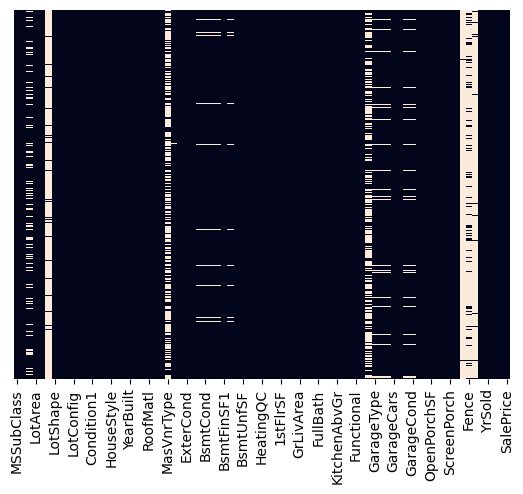

In [29]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

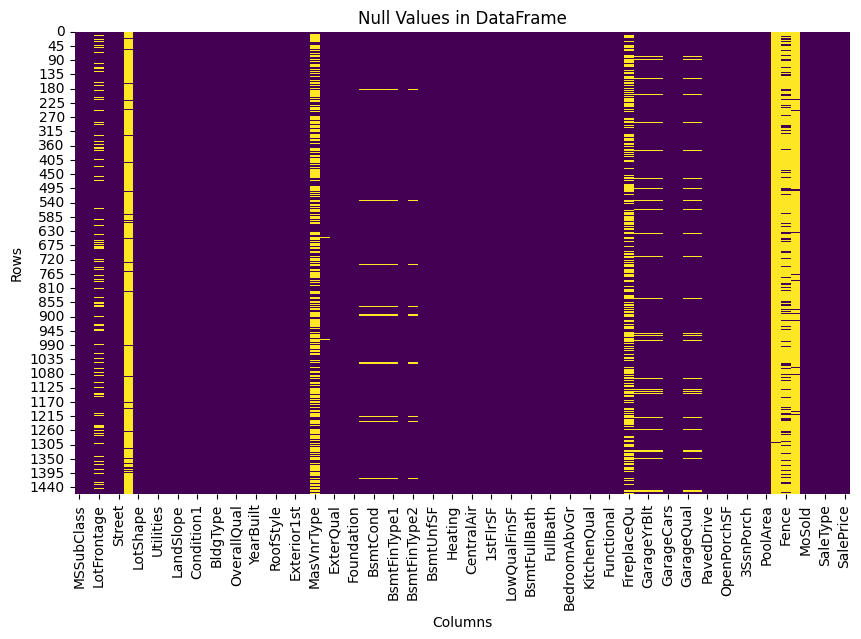

In [30]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create a heatmap showing null values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Customize the plot
plt.title('Null Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()